# **Supermarket Data Analysis**

-----------------------------

## **Business Understanding**

### **Background**
IndoMarket is a retail supermarket offering a variety of products, ranging from daily necessities such as fruits, meats, and fish, to tertiary goods like gold products and wine. To date, IndoMarket has conducted five campaigns aimed at boosting sales revenue. The management seems not satisfied with the previous campaigns and want to improve the strategy for the next campaigns. 

### **Problem Statement**
To enhance the effectiveness of future campaigns, IndoMarket’s management has requested data analysts to evaluate the performance of previous campaigns. Additionally, the company seeks to understand customer segmentation and identify potential areas for growth and development. This information will be instrumental in designing more strategic and effective campaigns moving forward.

`Key Questions:`
1. How effective were the previous campaigns in attracting customers and enhancing sales?
2. What insights can we gain regarding customer purchasing behavior based on their demographic information?
3. What potential areas can be developed or improved to enhance future campaigns and sales?

### **Goals**
The main goal is to evaluate the previous campaigns and gain a better understanding of customer preferences. Armed with this information, the marketing team can refine their strategies, helping IndoMarket to increase sales and grow the business.

------------------------------

## **Data Analysis**

After completing the data cleaning, we will conduct an analysis to evaluate the performance of IndoMarket's previous campaigns. Next, we will also study customer behavior based on demographic characteristics. Lastly, we will explore potential opportunities that IndoMarket can maximize in designing the next marketing campaigns.

In [5]:
# setup library
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msn
import math
from scipy.stats import normaltest
from category_encoders import OrdinalEncoder


import warnings
warnings.filterwarnings('ignore')

In [6]:
# importing data

df_copy = pd.read_csv('data_cleaned.csv')
display(df_copy.head(), df_copy.tail())

,Unnamed: 0,ID,Year_Birth,Age,Age_Group,Education,FamilySize,Income,IncomeClass,Dt_Customer,...,NumStorePurchases,NumWebVisitsMonth,T_NPurchase,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,T_AcceptedCmpgn,Complain
0,0,5524,1957,57,Middle-aged,Undergraduate,1,58138.0,Middle,2012-09-04,...,4,7,25,0,0,0,0,0,0,0
1,1,2174,1954,60,Old,Undergraduate,3,46344.0,Lower Middle,2014-03-08,...,2,5,6,0,0,0,0,0,0,0
2,2,4141,1965,49,Middle-aged,Undergraduate,2,71613.0,Middle,2013-08-21,...,10,4,21,0,0,0,0,0,0,0
3,3,6182,1984,30,Young Adults,Undergraduate,3,26646.0,Poor,2014-02-10,...,4,6,8,0,0,0,0,0,0,0
4,4,5324,1981,33,Young Adults,Postgraduate,3,58293.0,Middle,2014-01-19,...,6,5,19,0,0,0,0,0,0,0


,Unnamed: 0,ID,Year_Birth,Age,Age_Group,Education,FamilySize,Income,IncomeClass,Dt_Customer,...,NumStorePurchases,NumWebVisitsMonth,T_NPurchase,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,T_AcceptedCmpgn,Complain
2050,2233,9432,1977,37,Young Adults,Undergraduate,3,666666.0,Rich,2013-06-02,...,3,6,11,0,0,0,0,0,0,0
2051,2235,10870,1967,47,Middle-aged,Undergraduate,3,61223.0,Middle,2013-06-13,...,4,5,18,0,0,0,0,0,0,0
2052,2237,7270,1981,33,Young Adults,Undergraduate,1,56981.0,Middle,2014-01-25,...,13,6,19,0,1,0,0,0,1,0
2053,2238,8235,1956,58,Middle-aged,Postgraduate,3,69245.0,Middle,2014-01-24,...,10,3,23,0,0,0,0,0,0,0
2054,2239,9405,1954,60,Old,Postgraduate,4,52869.0,Middle,2012-10-15,...,4,7,11,0,0,0,0,0,0,0


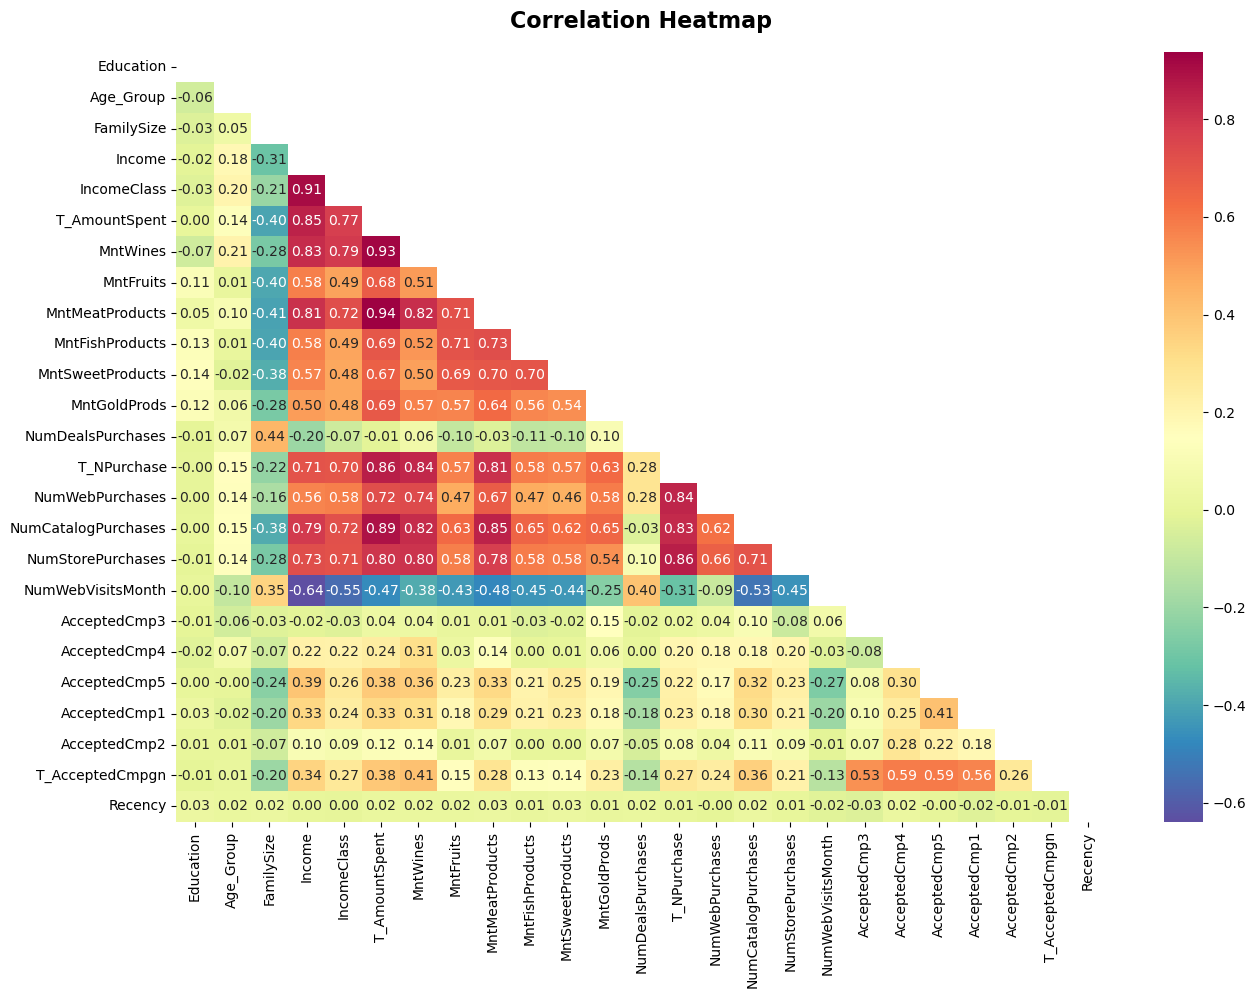

In [7]:
mappings = [
    {'col': 'Education',
    'mapping':{'Basic': 0, 'Undergraduate': 2, 'PostGraduate': 3}},
    {'col': 'Age_Group',
    'mapping':{'Young Adults': 0, 'Middle-aged': 1, 'Old': 2}},
    {'col': 'IncomeClass',
    'mapping':{'Poor': 0, 'Lower Middle': 1, 'Middle': 2, 'Upper Middle': 3, 'Rich': 4}}
]

ordinal_encoder = OrdinalEncoder(cols=['Education', 'Age_Group', 'IncomeClass'], mapping=mappings)
df_encoded = ordinal_encoder.fit_transform(df_copy)

df_encoded_1 = df_encoded[['Education', 'Age_Group', 'FamilySize', 'Income', 'IncomeClass', 'T_AmountSpent', 
                           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                           'MntGoldProds', 'NumDealsPurchases', 'T_NPurchase', 'NumWebPurchases','NumCatalogPurchases'
                           ,'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                            'AcceptedCmp1', 'AcceptedCmp2', 'T_AcceptedCmpgn', 'Recency']]

mask = np.triu(np.ones_like(df_encoded_1.corr(), dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded_1.corr(method='spearman'), cmap='Spectral_r', annot=True, fmt='.2f', mask=mask)
plt.title('Correlation Heatmap', fontsize=16, y=1.02, fontweight='bold')
plt.show()

### **`Q1. How effective were the previous campaigns in attracting customers and enhancing sales?`**

#### **1. What is the customer participation rate in each campaign?**

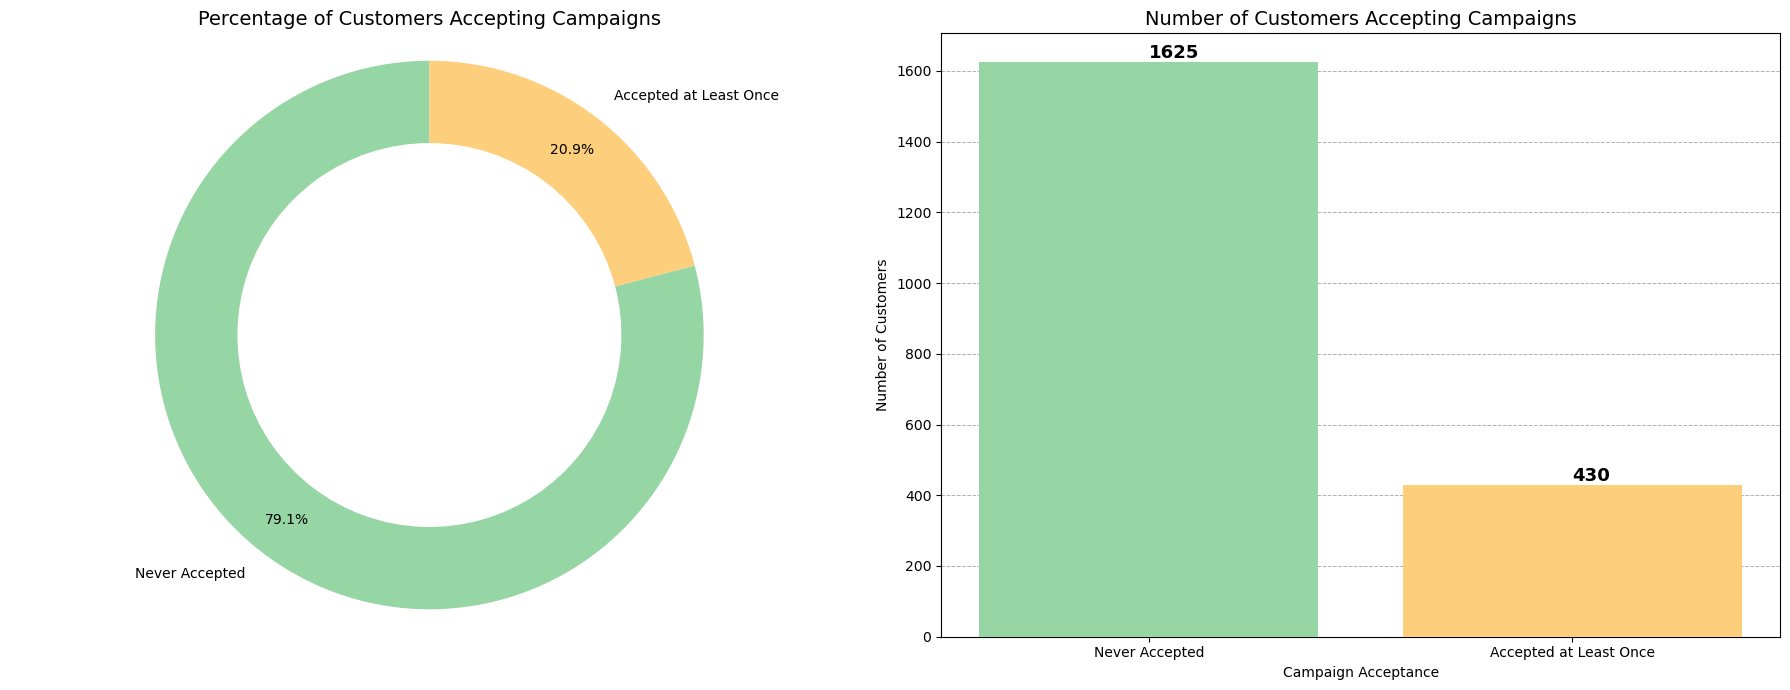

In [8]:

fig, axs = plt.subplots(1, 2, figsize=(18, 7))
never_accepted = (df_copy['T_AcceptedCmpgn'] == 0).sum()
accepted_at_least_once = (df_copy['T_AcceptedCmpgn'] > 0).sum()
labels = ['Never Accepted', 'Accepted at Least Once']
sizes = [never_accepted, accepted_at_least_once]
colors = ['#96d5a4', '#fdce7c']

# doughnut chart
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))
axs[0].axis('equal')  
axs[0].set_title('Percentage of Customers Accepting Campaigns', fontsize=14)

# barplot
bars = axs[1].bar(labels, sizes, color=colors, zorder=3)
axs[1].set_title('Number of Customers Accepting Campaigns', fontsize=14)
axs[1].set_ylabel('Number of Customers')
axs[1].set_xlabel('Campaign Acceptance')

for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', fontsize=13, fontweight='bold')  # va: vertical alignment

axs[1].yaxis.grid(True, linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


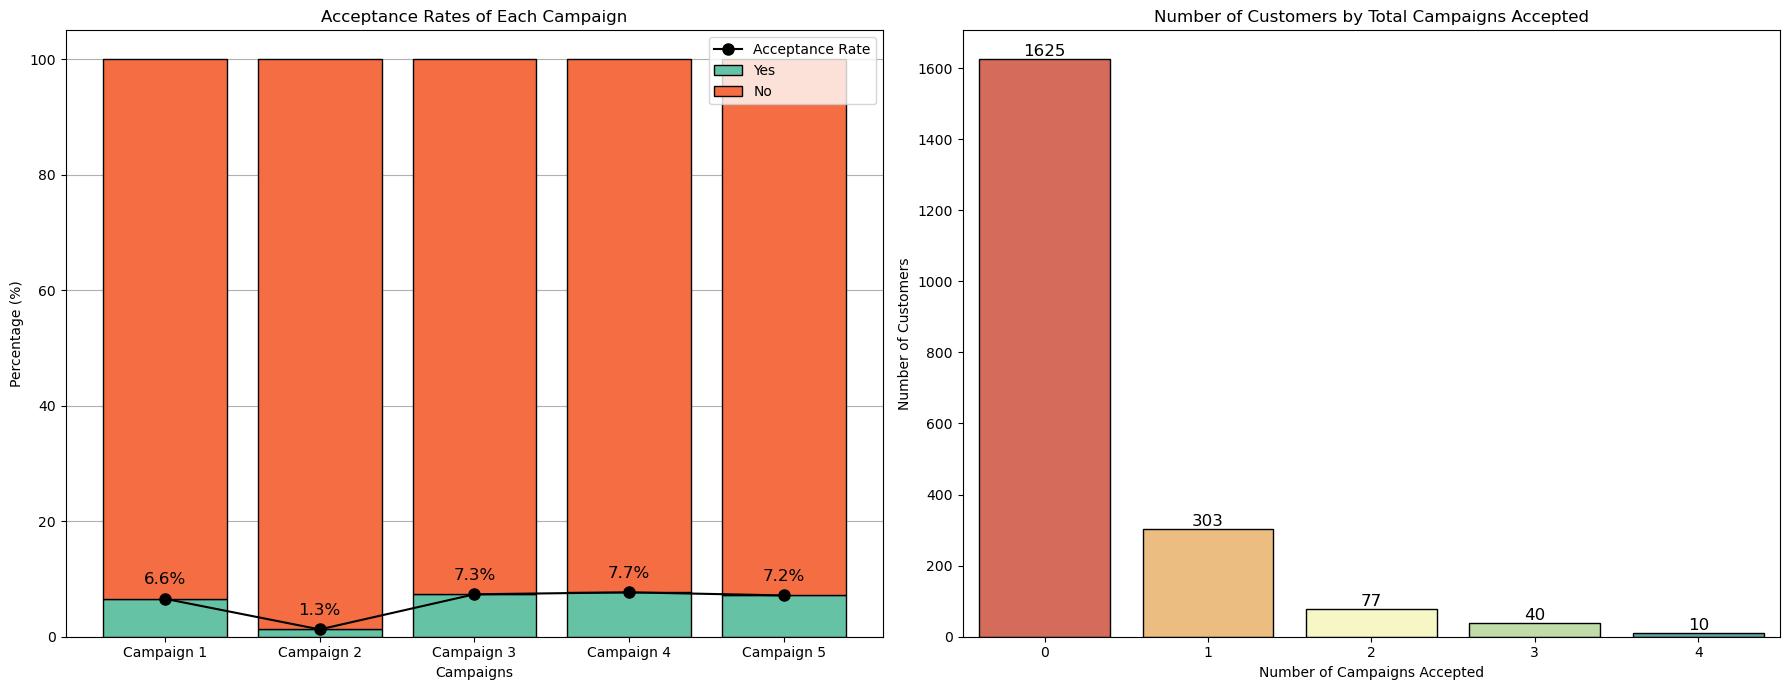

In [9]:

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# first fraph
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = df_copy[campaign_columns].mean() * 100
rejection_rates = 100 - acceptance_rates
x = np.arange(len(campaign_columns))

axs[0].bar(x, acceptance_rates, color=sns.color_palette("Spectral_r", as_cmap=True)(0.2), label='Yes', edgecolor='black')
axs[0].bar(x, rejection_rates, bottom=acceptance_rates, color=sns.color_palette("Spectral_r", as_cmap=True)(0.8), label='No', edgecolor='black', zorder=2)
axs[0].plot(x, acceptance_rates, color='black', marker='o', linestyle='-', linewidth=1.5, markersize=8, label='Acceptance Rate')

for i, rate in enumerate(acceptance_rates):
    axs[0].text(i, rate+2, f"{rate:.1f}%", ha='center', va='bottom', fontsize=12, color='black')

axs[0].set_xticks(x)
axs[0].set_xticklabels([f"Campaign {i+1}" for i in range(len(campaign_columns))])
axs[0].set_xlabel('Campaigns')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('Acceptance Rates of Each Campaign')
axs[0].legend()
axs[0].grid(True, axis='y')

# Second graph
acceptance_counts = df_copy['T_AcceptedCmpgn'].value_counts().sort_index()

bars = sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, palette='Spectral', edgecolor='black', ax=axs[1])

for bar in bars.patches:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12, color='black')
    
axs[1].set_title('Number of Customers by Total Campaigns Accepted')
axs[1].set_xlabel('Number of Campaigns Accepted')
axs[1].set_ylabel('Number of Customers')
axs[1].set_xticks(ticks=range(len(acceptance_counts.index)))
axs[1].set_xticklabels(acceptance_counts.index)

plt.tight_layout()
plt.show()


##### **Insight :**

- A significant majority of customers have not enganged with the campaigns. 
- Out of 2055 customers at IndoMarket, only 430 people, or 20.9%, have ever accepted a campaign at least once. 79.1% have never accepted a campaign. 
- The stacked bar shows that there was a decrease in participation from campaign 1 to campaign 2. However, the participation rate remained relatively stable at around 7.5% for campaigns 3, 4, and 5.
- Out of the five campaigns, the lowest participation rate is 1.3%, and the highest is 7.7%.
- The acceptance rate for each campaign is all below 10%.


#### **2. Is there a relationship between the campaigns and the transaction frequency?**


One way to assess the effectiveness of a campaign is by examining its relationship with other variables, such as the number of purchases and transaction volume or amount spent. From this, we can observe whether there are any changes that correlate with the campaign. If the campaign is effective, there should be correlated changes associated with it. This approach allows for a nuanced evaluation of the campaign’s impact and success.

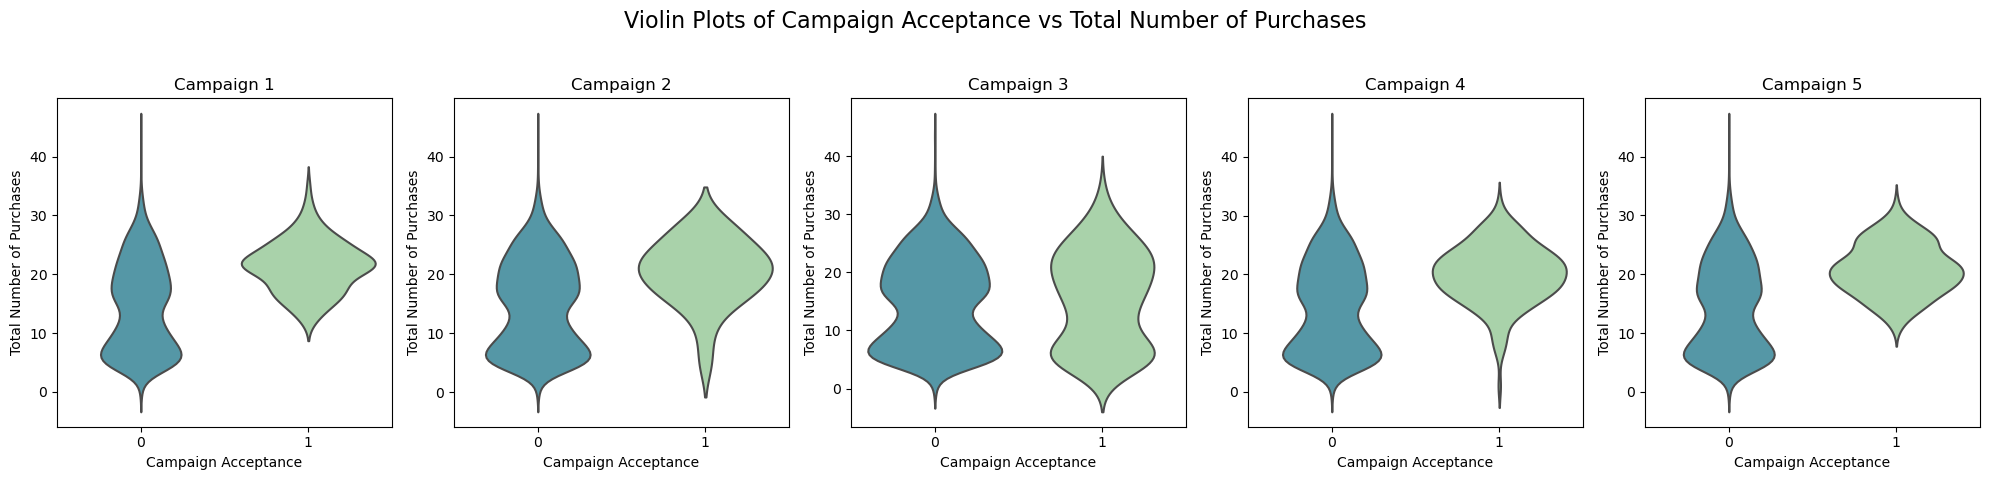

In [10]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Violin Plots of Campaign Acceptance vs Total Number of Purchases', fontsize=16)

sns.set_palette("Spectral_r")
for i, column in enumerate(campaign_columns):
    sns.violinplot(x=column, y='T_NPurchase', data=df_copy, ax=axs[i], inner=None)
    axs[i].set_title(f"Campaign {i+1}")
    axs[i].set_xlabel('Campaign Acceptance')
    axs[i].set_ylabel('Total Number of Purchases')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make sure everything fits without overlapping
plt.show()


Upon reviewing the correlation heatmap above, it is evident that accepting a campaign correlates with purchase frequency and transaction volume, with varying correlation values for each campaign.

Next, we observe a comparison of the median values of the total transactions and transaction volumes between customers who received the campaign and those who did not. This comparison allows us to evaluate the relative effectiveness and impact of the campaigns on customer purchasing behavior.

In [11]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
table = pd.DataFrame(columns=campaign_columns, index=['Yes', 'No'])

# Filling the table with the total amount spent
for column in campaign_columns:
    table.loc['Yes', column] = df_copy[df_copy[column] == 1]['T_NPurchase'].median()
    table.loc['No', column] = df_copy[df_copy[column] == 0]['T_NPurchase'].median()

table

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Yes,21.0,21.0,16.0,20.0,21.0
No,14.0,15.0,15.0,14.0,14.0


We will conduct a hypothesis test to determine whether the population that received the campaign is equal to the population that did not receive the campaign. This test will allow us to evaluate the impact of the campaign on the population.

The hypothesis test we will use is the Mann-Whitney U test, also known as the Wilcoxon rank-sum test. This test is used to compare two independent non-parametric populations. It will help us understand whether there are significant differences in the total number of purchases between the two groups, providing insights into the effectiveness of the campaigns.

The hypotheses would be as follows:

 - **Null Hypothesis (H0)**: The median total number of purchases is the same or lower for those who accepted the campaign compared to those who didn’t.

- **Alternative Hypothesis (H1)** : The median total number of purchases is higher for those who accepted the campaign compared to those who didn’t.

In [12]:
from scipy.stats import mannwhitneyu
p_value_table = pd.DataFrame(columns=campaign_columns, index=['p-value'])

for column in campaign_columns:
    accepted = df_copy[df_copy[column] == 1]['T_NPurchase']
    not_accepted = df_copy[df_copy[column] == 0]['T_NPurchase']
    
    _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
    
    p_value_table.loc['p-value', column] = p_value

p_value_table 

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
p-value,0.0,0.000092,0.226057,0.0,0.0


From the results of the test, we find that:

**AcceptedCmp1, AcceptedCmp4, AcceptedCmp5:**

The p-values are 0, indicating strong evidence against the null hypothesis. We conclude that there is enough supporting evidence to state that customers who accepted the offers in these campaigns have a significantly higher median total number of purchases than those who did not accept the offers.

**AcceptedCmp2:**

The p-value is 0.000092, which is less than the common alpha level of 0.05. This also leads us to reject the null hypothesis. We can conclude that there is enough evidence to suggest that the group who accepted the campaign offers has a higher median total number of purchases.

**AcceptedCmp3:**

The p-value is 0.226057, which is greater than 0.05. In this case, we fail to reject the null hypothesis, suggesting that there might not be a significant difference in the median total number of purchases between customers who accepted and those who didn’t accept the offers in this campaign.

#### **3. Is there a relationship between the campaigns and the transaction size?**

Here is the violin plot that illustrates the differences in the amount spent between individuals who accepted and those who did not accept the campaign offers. 

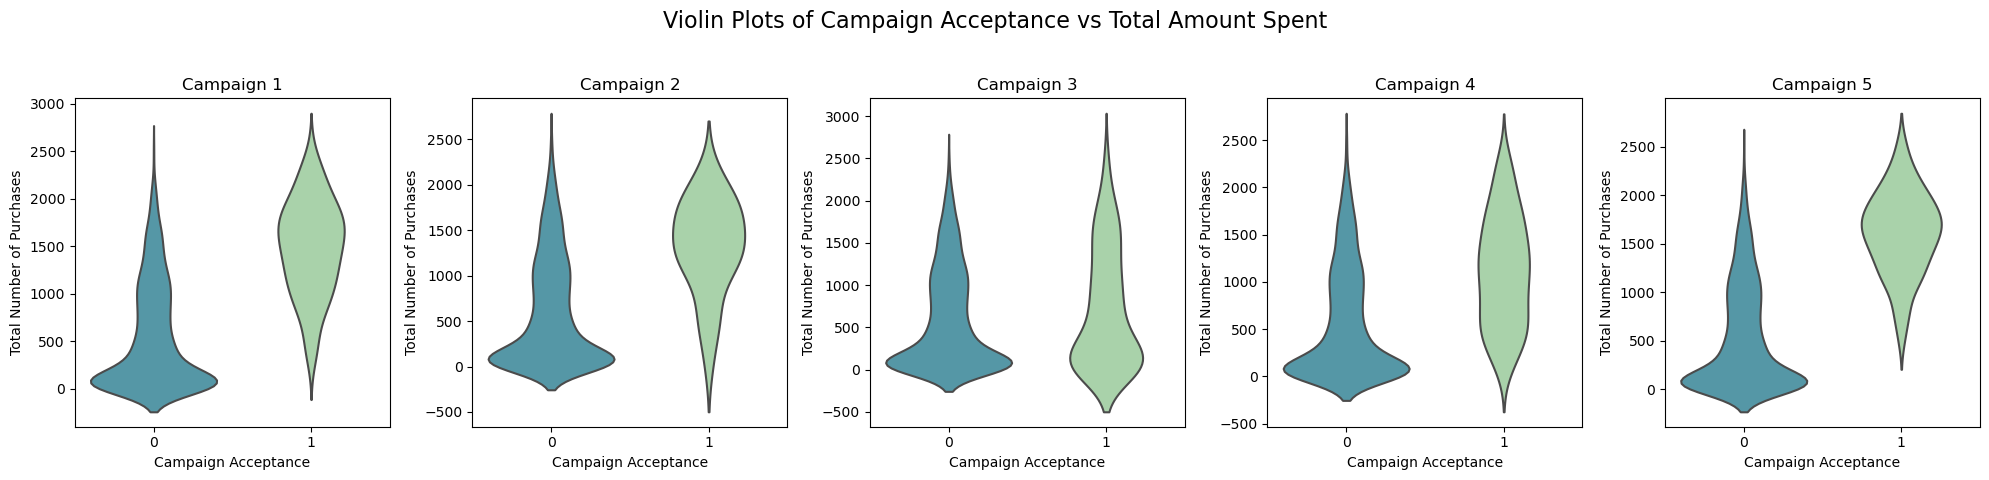

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Violin Plots of Campaign Acceptance vs Total Amount Spent', fontsize=16)

# Creating violin plots for each campaign
for i, column in enumerate(campaign_columns):
    sns.violinplot(x=column, y='T_AmountSpent', data=df_copy, ax=axs[i], inner=None)
    axs[i].set_title(f"Campaign {i+1}")
    axs[i].set_xlabel('Campaign Acceptance')
    axs[i].set_ylabel('Total Number of Purchases')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make sure everything fits without overlapping
plt.show()

To see the relationship between campaign and transaction volume, we'll also conduct hypothesis testing using Mann-Whitney. The test will be conducted with the "greater" alternative hypothesis, which means we are testing whether the median T_AmountSpent is higher for customers who accepted the campaign offers.

In [14]:
for column in campaign_columns:
    table.loc['Yes', column] = df_copy[df_copy[column] == 1]['T_AmountSpent'].median()
    table.loc['No', column] = df_copy[df_copy[column] == 0]['T_AmountSpent'].median()

table

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Yes,1515.0,1375.0,488.0,1101.0,1672.0
No,316.5,385.0,393.0,317.0,312.0


For this test, hypotheses would be as follows:

 - **Null Hypothesis (H0)**: The median total number of amount spent is the same or lower for those who accepted the campaign compared to those who didn’t.

- **Alternative Hypothesis (H1)** : The median total amount spent is higher for those who accepted the campaign compared to those who didn’t.

In [15]:
p_value_table = pd.DataFrame(columns=campaign_columns, index=['p-value'])

for column in campaign_columns:
    accepted = df_copy[df_copy[column] == 1]['T_AmountSpent']
    not_accepted = df_copy[df_copy[column] == 0]['T_AmountSpent']
    
    _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
    
    p_value_table.loc['p-value', column] = p_value

p_value_table 

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
p-value,0.0,0.0,0.040309,0.0,0.0


The interpretation of this result is as follows:

**AcceptedCmp1, AcceptedCmp2, AcceptedCmp4, AcceptedCmp5:** 

The p-values are 0, strongly suggesting that we reject the null hypothesis. This indicates that customers who accepted the offers in these campaigns have a significantly higher median T_AmountSpent compared to those who didn’t accept the offers.

**AcceptedCmp3:** 

The p-value is 0.040309, which is slightly below the common alpha level of 0.05. This suggests that there is some evidence to reject the null hypothesis, indicating a higher median T_AmountSpent among customers who accepted the offers in this campaign, but the evidence is not as strong as in the other campaigns.

#### **4. Is there a relationship between the campaigns and product sales?**

We'll do hypothesis test to understand the relationship between each campaign and the product sales. 

For this test, hypotheses would be as follows:

 - **Null Hypothesis (H0)**: The median total amount spent on the respective product is the same or lower for those who accepted the campaign compared to those who didn’t.

- **Alternative Hypothesis (H1)** : The median total amount spent on the respective product is higher for those who accepted the campaign compared to those who didn’t.

In [16]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
product_columns = [col for col in df_copy.columns if 'Mnt' in col]

p_values_products = pd.DataFrame(index=product_columns, columns=campaign_columns)

for product in product_columns:
    for campaign in campaign_columns:
        accepted = df_copy[df_copy[campaign] == 1][product]
        not_accepted = df_copy[df_copy[campaign] == 0][product]
        _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
        p_values_products.loc[product, campaign] = p_value

p_values_products

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
MntWines,0.0,0.0,0.049307,0.0,0.0
MntFruits,0.0,0.326285,0.292898,0.104873,0.0
MntMeatProducts,0.0,0.000866,0.329349,0.0,0.0
MntFishProducts,0.0,0.438221,0.923498,0.492741,0.0
MntSweetProducts,0.0,0.452629,0.842023,0.407174,0.0
MntGoldProds,0.0,0.000427,0.0,0.002232,0.0


The interpretation as follows:

**If the p-value is low (≤ 0.05):**
It means that there's a significant difference in the spending on the respective product between customers who participated in the campaign and those who didn’t. In this case, the campaign is associated with a change in spending on that product.

**If the p-value is high (> 0.05):**
It indicates that there's no significant difference in the spending on that product between customers who participated and didn’t participate in the campaign. Here, the campaign is not associated with a significant change in spending on the product.

Let's break down for each campaign.
- **AcceptedCmp1** : All products show a p-value of 0.0, indicating a significant relationship between the campaign and the spending on these products.
- **AcceptedCmp2** : **MntWines** and **MntGoldProds** show a value below 0.05, which indicating a significant relationship between the campaign and the spending of these products. 
- **AcceptedCmp3** : 
    **MntWines** and **MntGoldProds** show a value below 0.05, which indicating a significant relationship between the campaign and the spending of these products. 
- **AcceptedCmp4** : 
    **MntWines**, **MntGoldProds** and **MntMeatProducts** show a value below 0.05, which indicating a significant relationship between the campaign and the spending of these products. 
- **AcceptedCmp5** : 
    All products show a p-value of 0.0, indicating a significant relationship between the campaign and the spending on these products.

The results of this hypothesis testing are also strengthened by the following boxplot visualization.

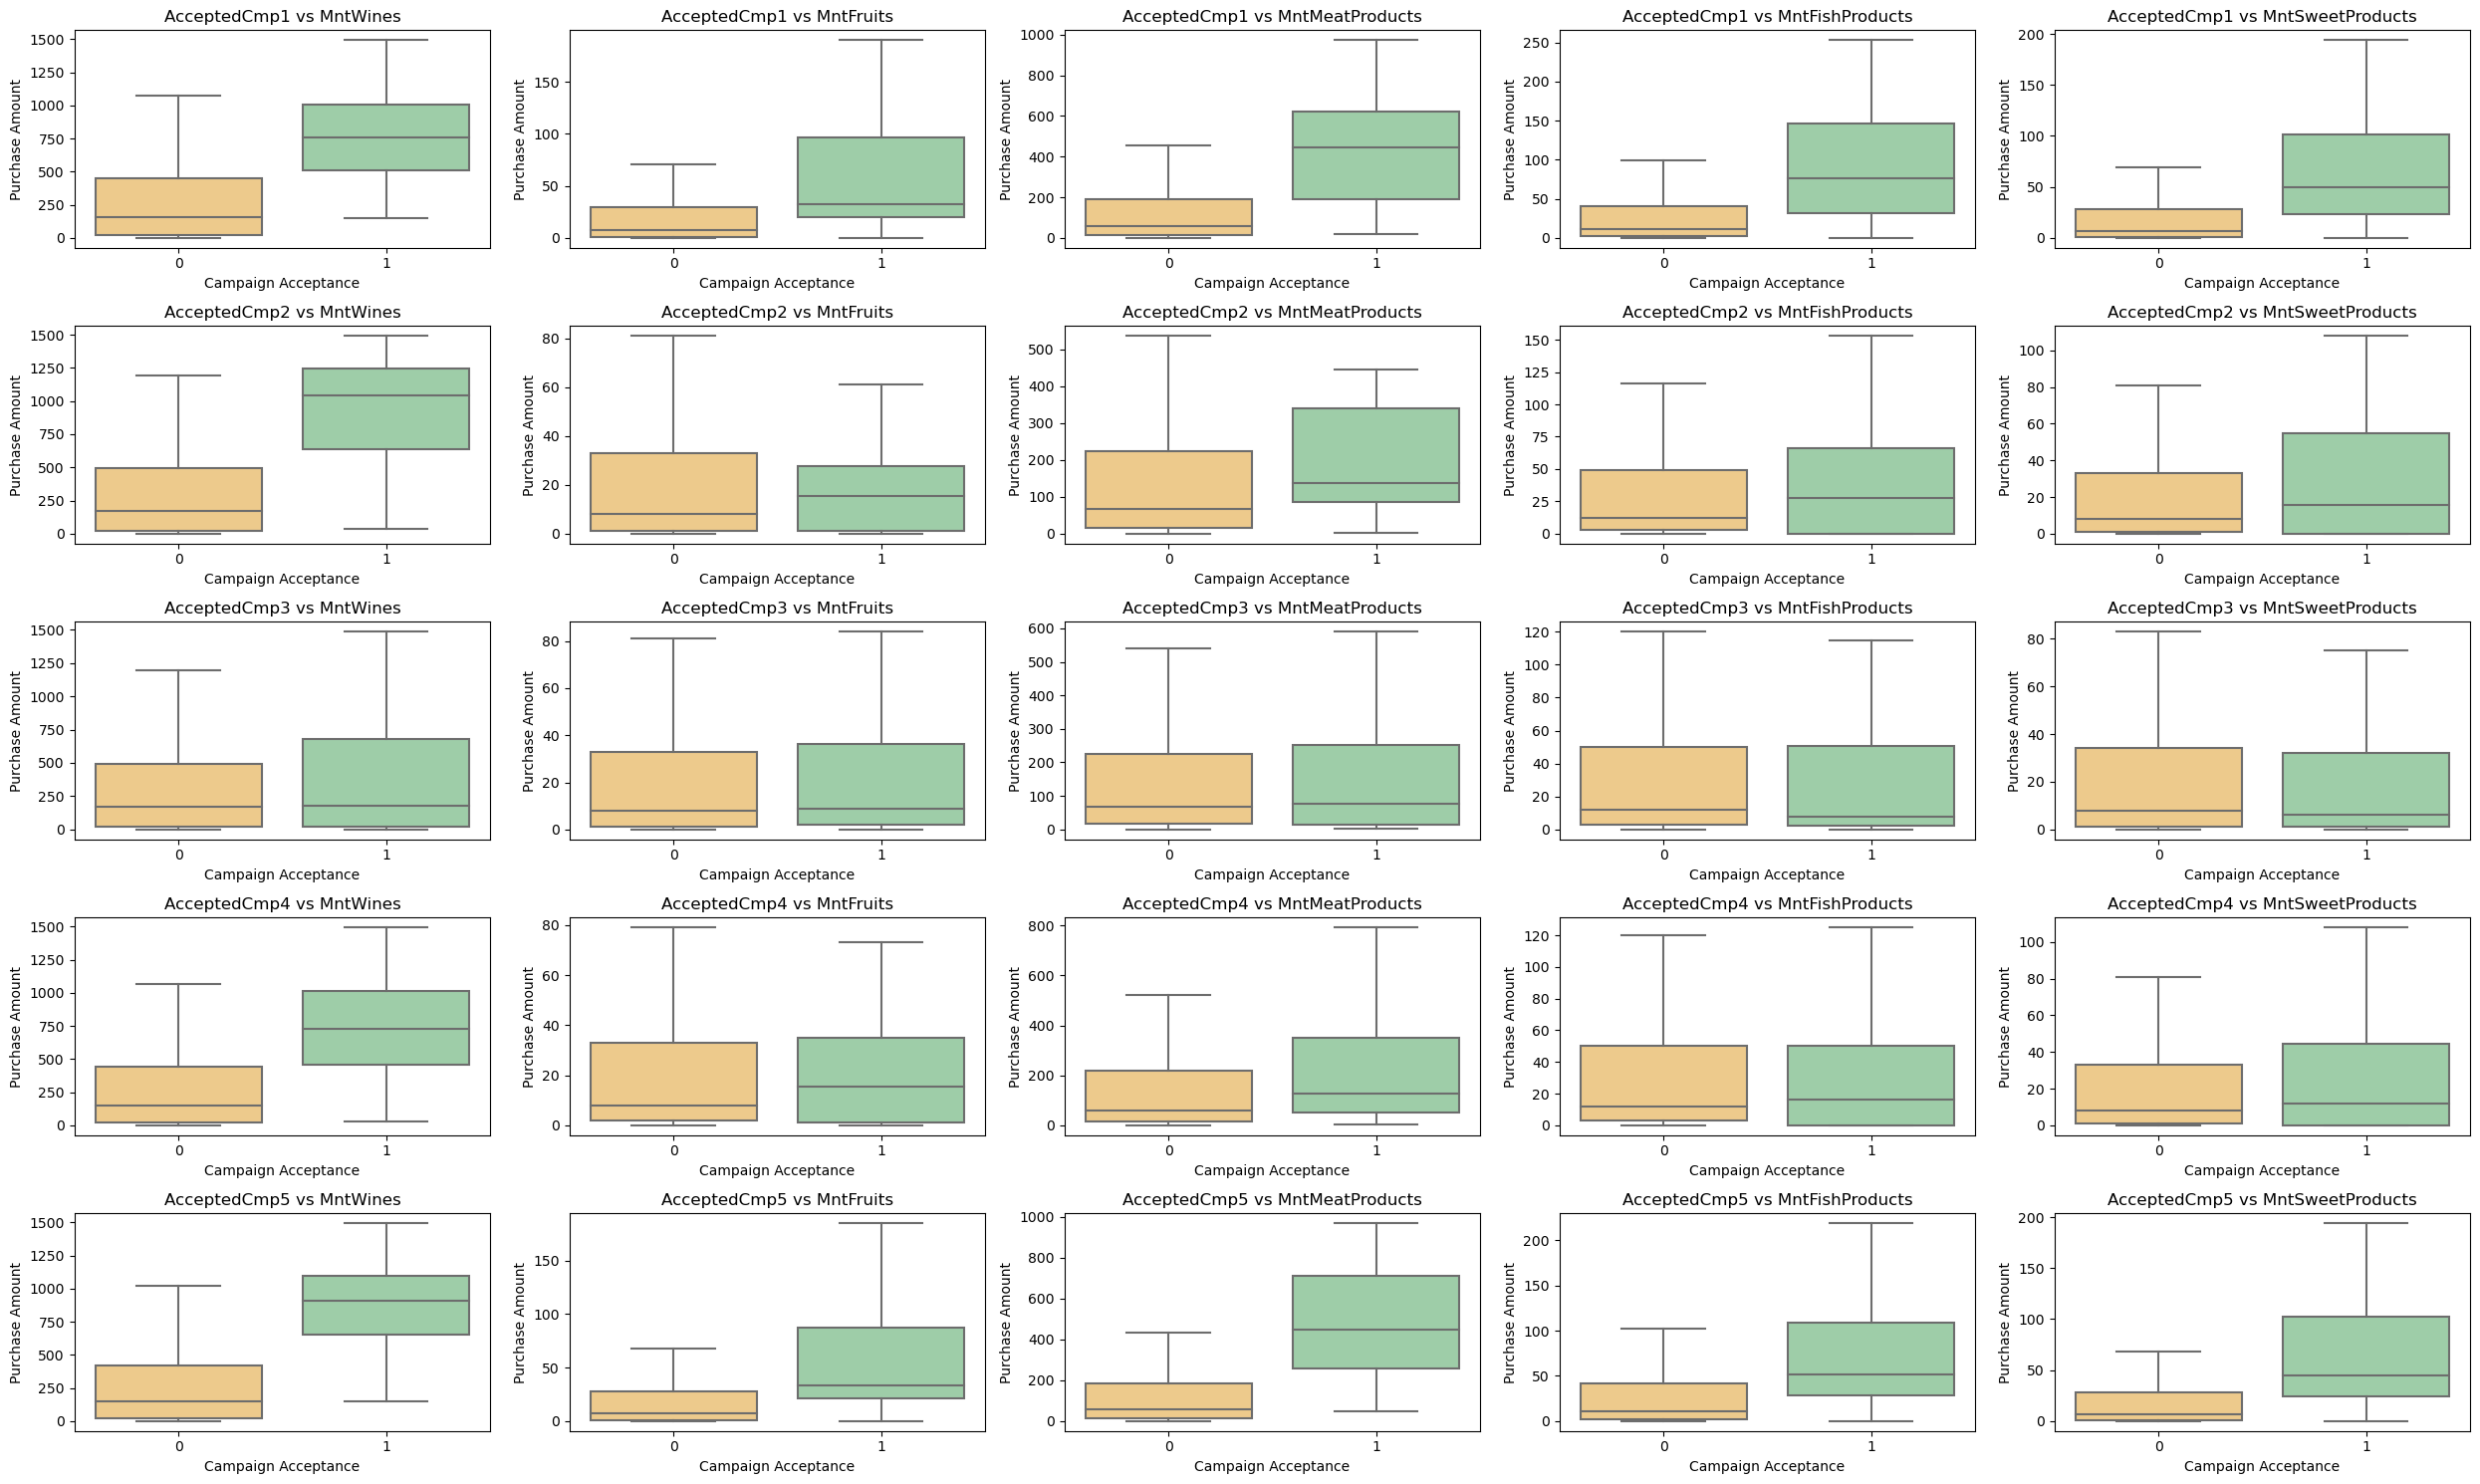

In [17]:

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

colors = ["#fdce7c", "#96d5a4"]

# Creating boxplots
plt.figure(figsize=(25, 15))

# Number of rows in the grid
n_rows = len(campaign_columns)

for i, campaign in enumerate(campaign_columns):
    for j, product in enumerate(product_columns):
        plt.subplot(n_rows, len(product_columns), i*len(product_columns) + j + 1)
        
        # Creating the boxplot
        sns.boxplot(x=campaign, y=product, data=df_copy, palette=colors, showfliers=False)
        
        # Setting the title and labels
        plt.title(f'{campaign} vs {product}')
        plt.xlabel('Campaign Acceptance')
        plt.ylabel('Purchase Amount')
        
        # Ensuring a tight layout
        plt.tight_layout()

plt.show()


#### **5. Is there a relationship between the campaigns and purchase channel?**

To understand the relationship between campaigns and the purchase number on each channels, we'll do hypothesis testing using following hypothesis: 

 - **Null Hypothesis (H0)**: The median total number of purchase on the respective channel is the same or lower for those who accepted the campaign compared to those who didn’t.

- **Alternative Hypothesis (H1)** : The median total number of purchase on the respective channel is higher for those who accepted the campaign compared to those who didn’t.

In [18]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
channels_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

p_values_products = pd.DataFrame(index=channels_columns, columns=campaign_columns)

for channel in channels_columns:
    for campaign in campaign_columns:
        accepted = df_copy[df_copy[campaign] == 1][channel]
        not_accepted = df_copy[df_copy[campaign] == 0][channel]
        _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
        p_values_products.loc[channel, campaign] = p_value

p_values_products

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
NumWebPurchases,0.0,0.032368,0.046575,0.0,0.0
NumCatalogPurchases,0.0,0.0,0.000002,0.0,0.0
NumStorePurchases,0.0,0.000042,0.999899,0.0,0.0


The interpretation as follows:

**If the p-value is low (≤ 0.05):**
It means that there's a significant difference in the purchasing from the respective channel between customers who participated in the campaign and those who didn’t. In this case, the campaign is associated with a change in purchasing number from the channel.

**If the p-value is high (> 0.05):**
It indicates that there's no significant difference in the spending from the respective channel between customers who participated and didn’t participate in the campaign. Here, the campaign is not associated with a significant change in purchasing number from the channel.

Let's break down for each campaign.
- **AcceptedCmp1** : All channels show a p-value of 0.0, indicating a significant relationship between the campaign and the purchasing number from the channels.
- **AcceptedCmp2** : **NumCatalogPurchase** shows a value below 0.05, which indicating a significant relationship between the campaign and the purchasing number from this channel.
- **AcceptedCmp3** : **NumWebPurchases** and **NumCatalogPurchases** show a value below 0.05, which indicating a significant relationship between the campaign and the purchasing number from the channels.
- **AcceptedCmp4** : All channels show a p-value of 0.0, indicating a significant relationship between the campaign and the purchasing number from the channels.
- **AcceptedCmp5** : All channels show a p-value of 0.0, indicating a significant relationship between the campaign and the purchasing number from the channels.

#### **6. Is there a relationship between the campaigns and customer recency?**

In [19]:
for column in campaign_columns:
    table.loc['Yes', column] = df_copy[df_copy[column] == 1]['Recency'].median()
    table.loc['No', column] = df_copy[df_copy[column] == 0]['Recency'].median()

table

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Yes,44.0,43.5,38.0,55.0,52.0
No,49.0,49.0,50.0,49.0,49.0


For this test, hypotheses would be as follows:

 - **Null Hypothesis (H0)**: The median recency is the same or greater for those who accepted the campaign compared to those who didn’t.

- **Alternative Hypothesis (H1)** : The median recency is less for those who accepted the campaign compared to those who didn’t.


If the null hypothesis is rejected (p-value < 0.05), it suggests that accepting the campaign is associated with more recent purchases. And ff the null hypothesis is not rejected (p-value > 0.05), it indicates that there is not enough statistical evidence to say that accepting the campaign is associated with more recent purchases.

In [20]:
p_value_table = pd.DataFrame(columns=campaign_columns, index=['p-value'])

for column in campaign_columns:
    accepted = df_copy[df_copy[column] == 1]['Recency']
    not_accepted = df_copy[df_copy[column] == 0]['Recency']
    
    _, p_value = mannwhitneyu(accepted, not_accepted, alternative='less')
    
    p_value_table.loc['p-value', column] = p_value

p_value_table 

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
p-value,0.14418,0.332109,0.062773,0.85732,0.470904


From the results above we get all p values ​​greater than 0.05, which means we accept h0. The implication is that we don't have enough evidence to say that the campaign is associated with recent purchases. In other words, the campaign is not associated with recency

### **`Q2. What insights can we gain regarding customer purchasing behavior based on their demographic information?`**
- How is the demographic distribution of the customer?
- How do spending amount differ across various customer demographics?
- How do purchase frequencies differ across various customer demographics?
- How do product preferences differ across various customer demographics?
- How do purchase channel preferences differ across various customer demographics?
- How do campaign acceptance differ various customer demographics?

#### **1. How is the demographic distribution of the customer?**

To begin, let’s delve into the demographic composition of our customer base by examining the distribution within each demographic category. We'll examine through four key facets : education, age group, income class, and family size. This visualization aims to give the big picture of customers characteristics. 

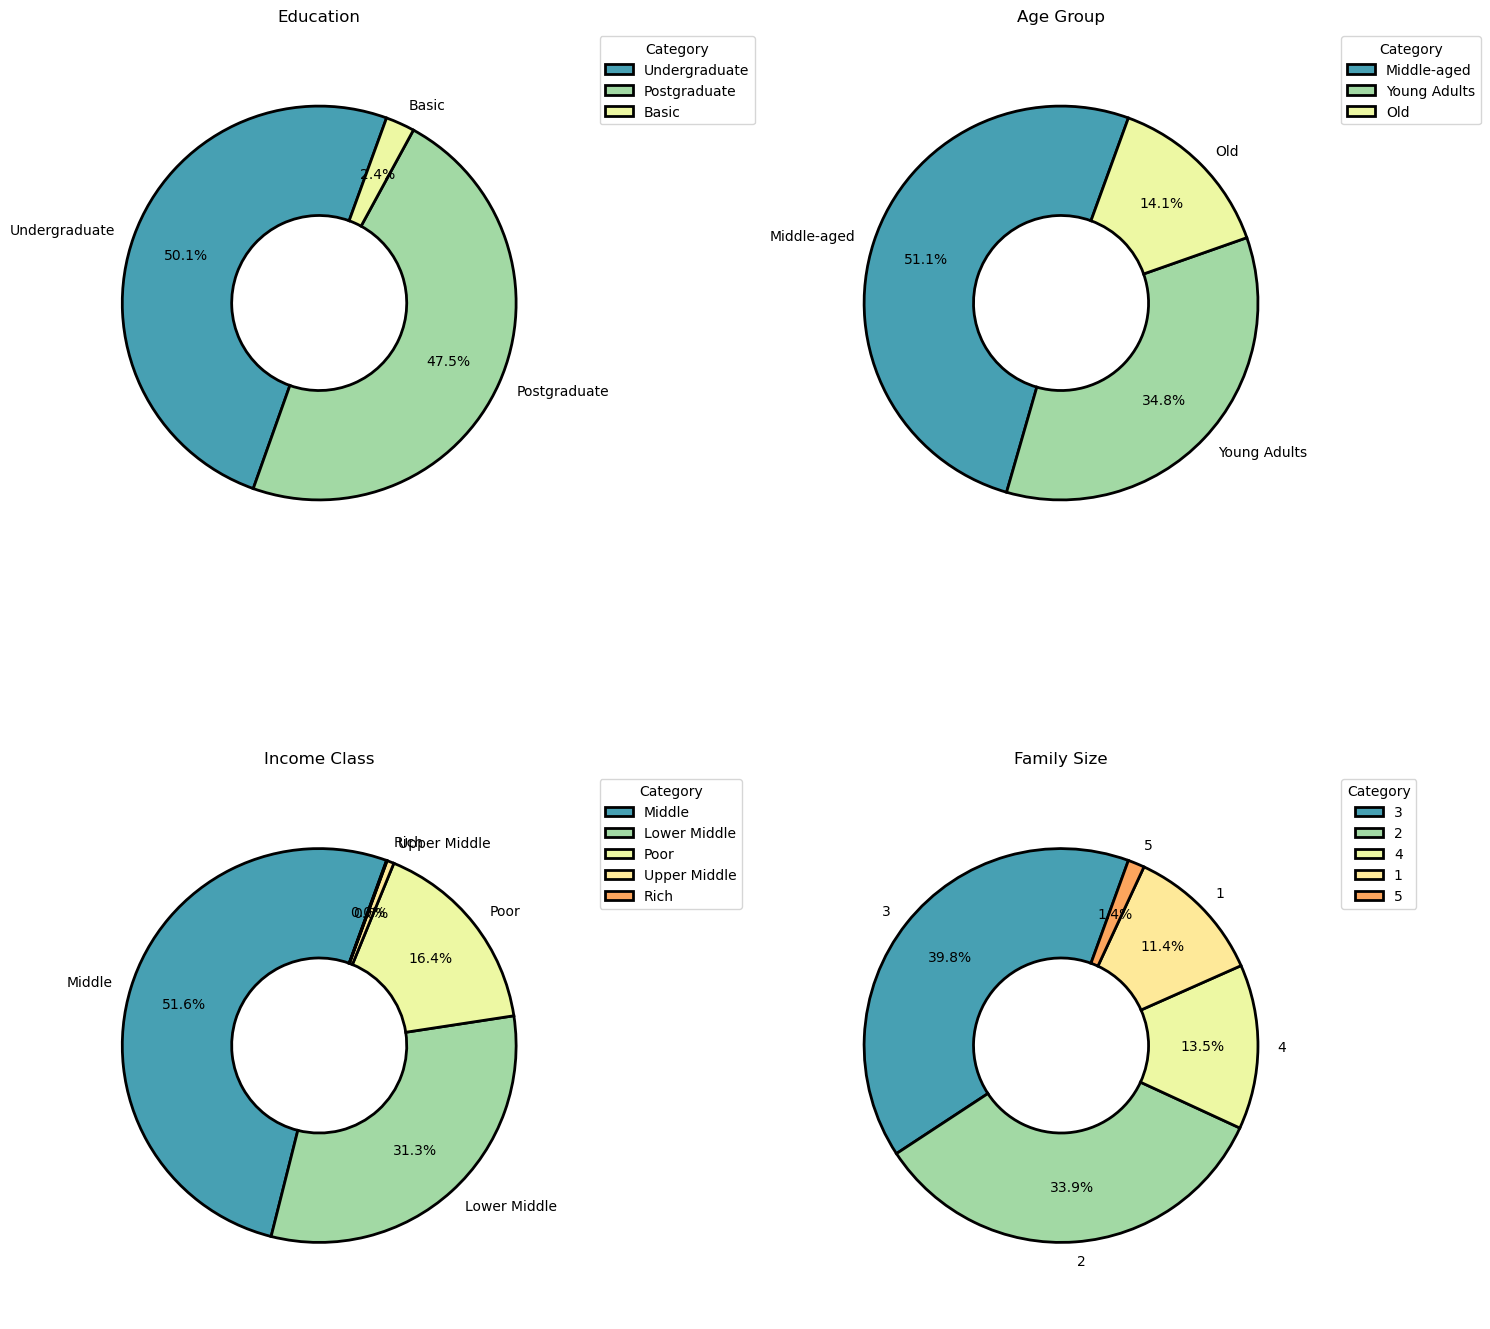

In [21]:

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
columns_to_plot = ['Education', 'Age_Group', 'IncomeClass', 'FamilySize']
titles = ['Education', 'Age Group', 'Income Class', 'Family Size']

colors = ['#ed6345', '#fdce7c', '#d1ec9c', '#96d5a4', '#fef1a7']

for i, ax in enumerate(axs.ravel()):
    column = columns_to_plot[i]
    title = titles[i]
    
    value_counts = df_copy[column].value_counts(normalize=True)
    
    wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index,
                                    textprops=dict(size= 10, color= "black"),
                                    autopct="%.1f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = sns.color_palette("Spectral_r"),
                                    # colors = ['#cf384d', '#fa9a58', '#fef1a7', '#d1ec9c', '#5bb6a9'], 
                                    shadow = False,
                                    wedgeprops=dict(width=0.5, edgecolor = "black", 
                                    linewidth = 2),
                                    startangle = 70)
    ax.set_title(title)
    
    # Adding a legend
    ax.legend(wedges, value_counts.index, title="Category", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


From the pie charts above, we can see that :

1. **Education**:
    - The majority of customers have attained higher education, with either undergraduate or postgraduate degrees.
    - 50.1% of customers hold an undergraduate degree.
    - 47.5% of customers have pursued postgraduate education.
    - The lowest percentage, 2.4%, is represented by customers with basic education.


2. **Age Group**:
    - Middle-aged customers dominate, comprising 51.1% of the customer base.
    - Young adults constitute the second-largest group, making up 34.8%.
    - Old-aged customers are the least common, accounting for 14.1%.


3. **Income Class**:
    - Customers within the middle income class are predominant, making up 51.6%.
    - The lower-middle income class customers are the second largest, representing 31.3%.
    - Customers with poor income category account for 14.1%.
    - The combined percentage of upper-middle and rich customers is 0.7%.


4. **Family Size**:
    - Single customers, or those with a family size of 1, account for 39.8%.
    - Customers with a family size of 2 represent 33.9%.
    - Customers with a family size of 3 constitute 13.5%.
    - Customers with a family size of 4 make up 11.4%.
    - Customers with a family size of 5 account for 1.4%.
    
##### **INSIGHT**
In general, it is observed that the majority of IndoMarket customers have an educational background of undergraduate and postgraduate levels. Most customers predominantly fall within the middle and lower-middle income classes, middle-age group, and the family size is mainly one or two members.

Now, we'll answer the sub-questions to observe how each category differs in terms of spending amount, purchase frequency, product preference, and channel preference.

#### **2. How does the spending amount & purchasing frequency vary across different customer categories?**

To compare the differences in customer characteristics based on spending amount and purchasing frequency, we will use the median value of the spending amount. This is because the data in the T_AmountSpent column and T_NPurchase column has a non-normal distribution. Untuk memastikan distribusinya kita akan menggunakan normality test.  

In [22]:
# check T_AmountSpent normality

stats, pval=normaltest(df_copy['T_AmountSpent'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [23]:
# check T_NPurchase normality

stats, pval=normaltest(df_copy['T_NPurchase'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


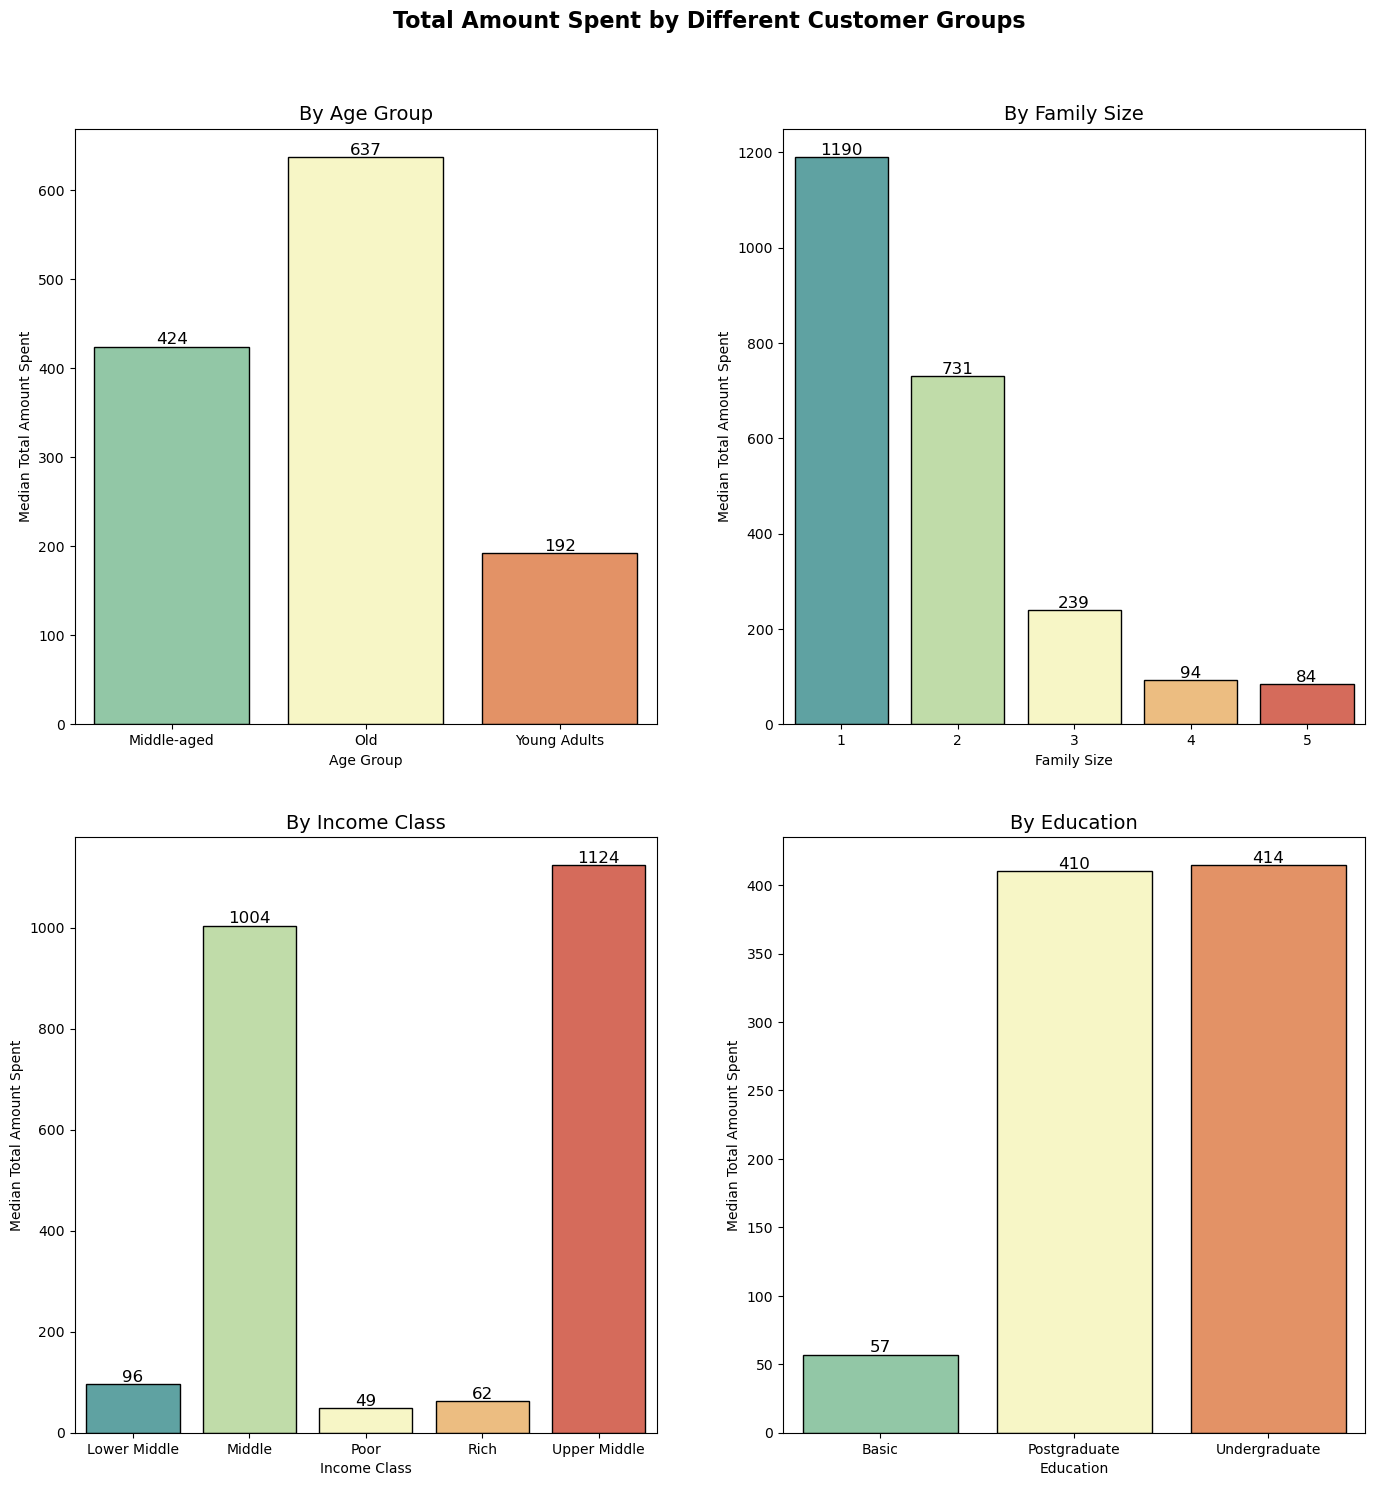

In [24]:
groups = [('Age_Group', 'Age Group'), ('FamilySize', 'Family Size'),
          ('IncomeClass', 'Income Class'), ('Education', 'Education')]

# grid and size
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.tight_layout(pad=6.0)

fig.suptitle('Total Amount Spent by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

def createplot(df, column, title, ax):
    bar_plot = sns.barplot(data=df, x=column, y='T_AmountSpent', palette='Spectral_r', ax=ax, orient='v', edgecolor='black')
    ax.set_title(f'By {title}', fontsize=14)
    ax.set_ylabel('Median Total Amount Spent')
    ax.set_xlabel(title)
    
    for p in bar_plot.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

for i, (group, title) in enumerate(groups):
    row = i // 2
    col = i % 2
    grouped_data = df_copy.groupby(group).agg({'T_AmountSpent': 'median'}).reset_index()
    createplot(grouped_data, group, title, axs[row, col])

plt.show()


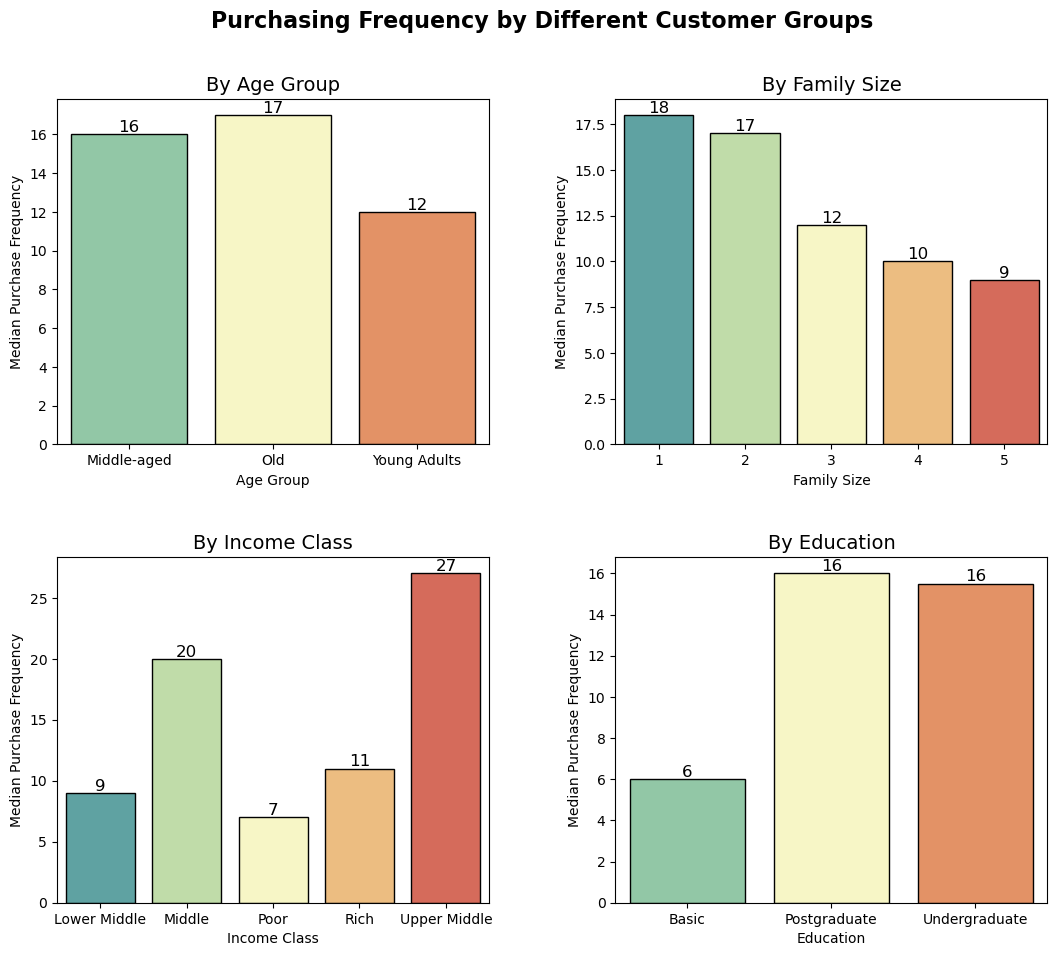

In [25]:
groups = [('Age_Group', 'Age Group'), ('FamilySize', 'Family Size'),
          ('IncomeClass', 'Income Class'), ('Education', 'Education')]

# creating grid & specify size
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.tight_layout(pad=6.0)
# creating title
fig.suptitle('Purchasing Frequency by Different Customer Groups', fontsize=16, y=1, fontweight='bold')

# creating function for plotting
def createplot(df, column, title, ax):
    bar_plot = sns.barplot(data=df, x=column, y='T_NPurchase', palette='Spectral_r', ax=ax, edgecolor='black')
    ax.set_title(f'By {title}', fontsize=14)
    ax.set_ylabel('Median Purchase Frequency')
    ax.set_xlabel(title)
    for p in bar_plot.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
# looping through groups and plotting
for i, (group, title) in enumerate(groups):
    row = i // 2
    col = i % 2
    grouped_data = df_copy.groupby(group).agg({'T_NPurchase': 'median'}).reset_index()
    createplot(grouped_data, group, title, axs[row, col])

plt.show()


From the charts above, we can see that :

- **Age Category:**
On age categories, the highest spending amounts and purchasing frequency are observed in the 'Old' age group, followed by 'Middle-aged' and 'Young Adults'. But in frequency between old and middle-age just slightly different. This suggests that older individuals tend to spend more, possibly due to higher disposable incomes or different consumption preferences.

- **Family Size:**
Customers with a family size of one have the highest spending amounts, while those with family sizes of four and five have the least spending. Interestingly, there is an observed trend where the spending amount decreases as family size increases, contrary to typical economic scales. From this graph, it can be interpreted that single individuals incur higher expenses, or the commodities purchased by singles are relatively pricier. The same pattern also found in the purchasing frequency. 

- **Income Class:**
Reviewing the income classes, the highest spending amounts and purchasing frequency are found in the 'Middle' and 'Upper-Middle' classes. These segments could be prioritized by businesses for targeting, as they seem to have a significant spending capacity.Jika ditinjau dari jumlahnya, proporsi upper middle class hanya 

- **Education Level:**
In terms of education levels, the lowest spending and purchasing frequency is in the 'Basic' category, while the highest spending and purchasing frequency is almost equally distributed between 'Undergraduate' and 'Postgraduate' levels. Given their frequency and relatively high spending amounts, customers with undergraduate and postgraduate educational backgrounds could be prioritized for business strategies and marketing efforts. 

#### **3. How do product preferences differ across various customer demographics?**

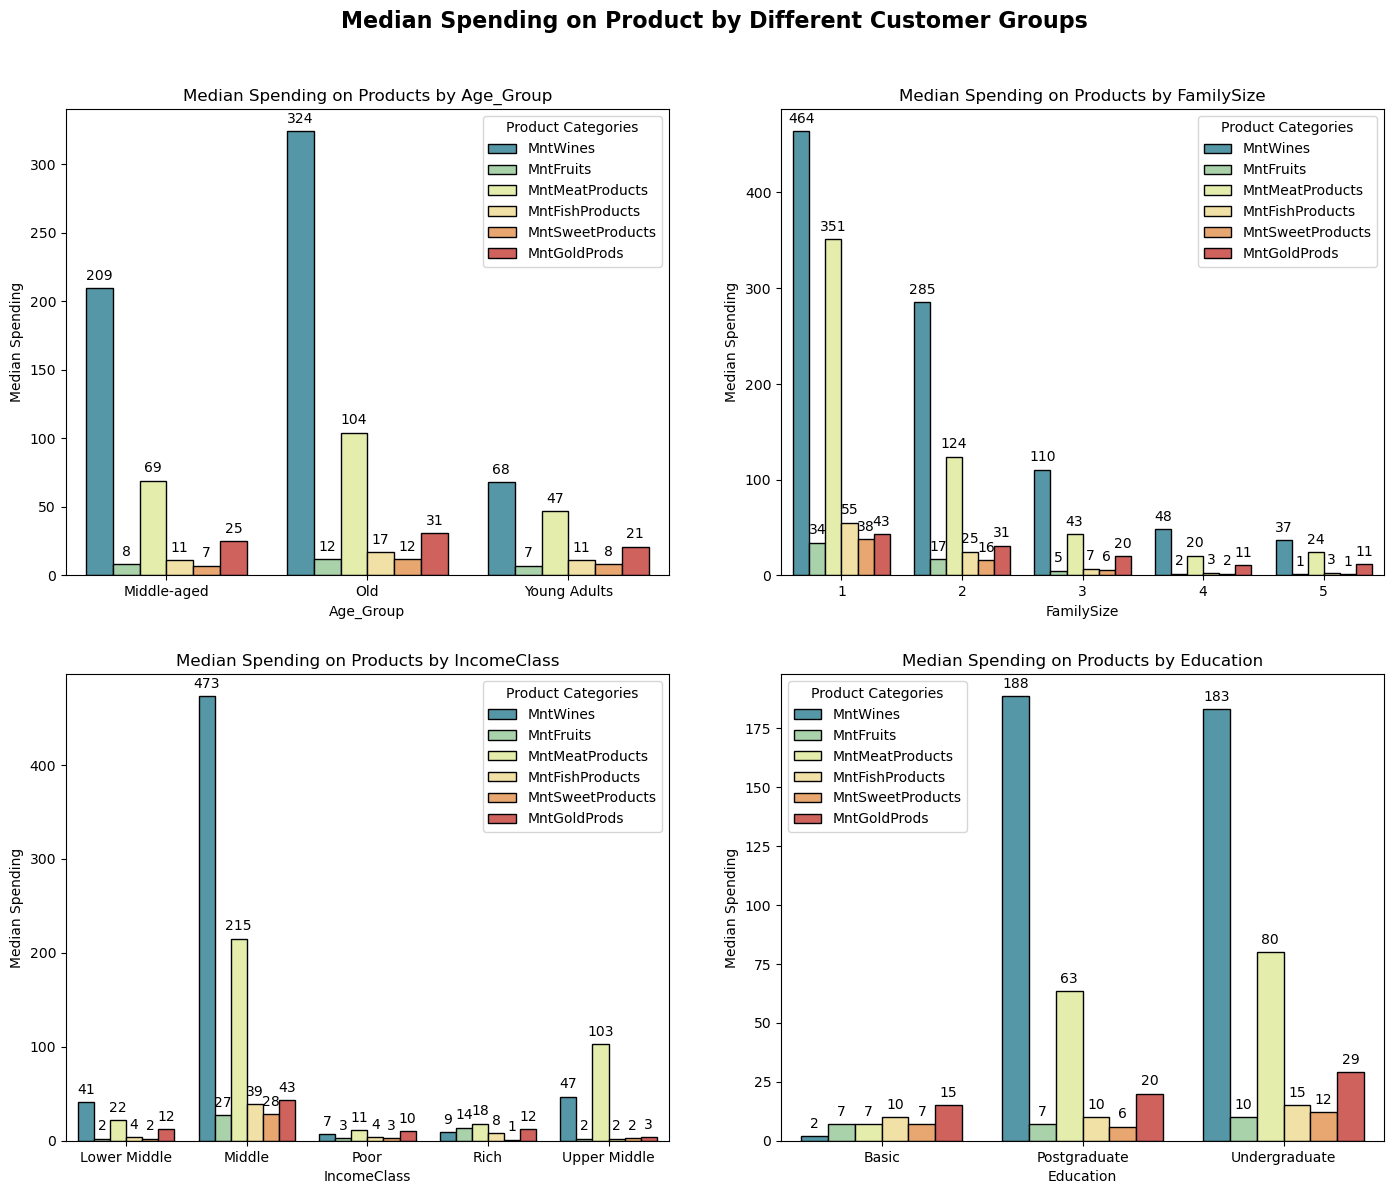

In [26]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
cust_group = ['Age_Group', 'FamilySize', 'IncomeClass', 'Education']

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.tight_layout(pad=5.0)

fig.suptitle('Median Spending on Product by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for i, group in enumerate(cust_group):
    
    row = i // 2
    col = i % 2
    
    grouped_data = df_copy.groupby(group)[products].median().reset_index().melt(id_vars=[group])
   
    ax = sns.barplot(data=grouped_data, x=group, y='value', hue='variable', palette='Spectral_r', ax=axs[row, col], edgecolor='black')
    
    axs[row, col].set_title(f'Median Spending on Products by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Median Spending')
    axs[row, col].legend(title='Product Categories')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
    
plt.show()

From the charts above, we can see that :

**Age Category:**

- The most dominant product across all age categories is wine.
- The consumption level of wine and meat is highest in the 'Old' age category and lowest in the 'Young' category.
- Although spending on wine and meat significantly varies across categories, the differences in spending on gold products are not as pronounced.

 **Family Size:**
- Wine dominates the purchases in each family size category.
- At lower purchase levels, specifically in the family sizes of 3, 4, and 5, it appears that the only products bought from IndoMarket are wine, meat, and gold products.

**Income Class:**
- Based on income class, the most purchases are made by the middle-income customers, followed by the upper-middle class.
- Wine and meat are the dominating products purchased by the middle, lower-middle, and upper-middle classes.
- Meat purchases in the upper-middle and rich categories are higher than wine.
- For the 'Poor' customer category, the spending on meat and gold is higher than on wine.
- The purchasing phenomenon of meat, gold, and wine by 'Poor' customers indicates that these commodities are not too price-sensitive.

**Education Level:**
- The purchase volumes of postgraduates and undergraduates do not differ significantly across various products.
- For consumers with a basic education level, the most purchased product is gold.

Overall, it appears that the type of products purchased across each category is dominated by wine and meat, followed by gold products at a lower proportion. Several possibilities could explain this phenomenon, such as these products being the supermarket's flagship commodities. Or, this supermarket could be the primary supplier of meat and wine, facing low competition from other supermarkets. Another possibility is that these two commodities are essential daily consumption items for consumers in the area.

#### **4. How do purchase channel preferences differ across various customer demographics?**

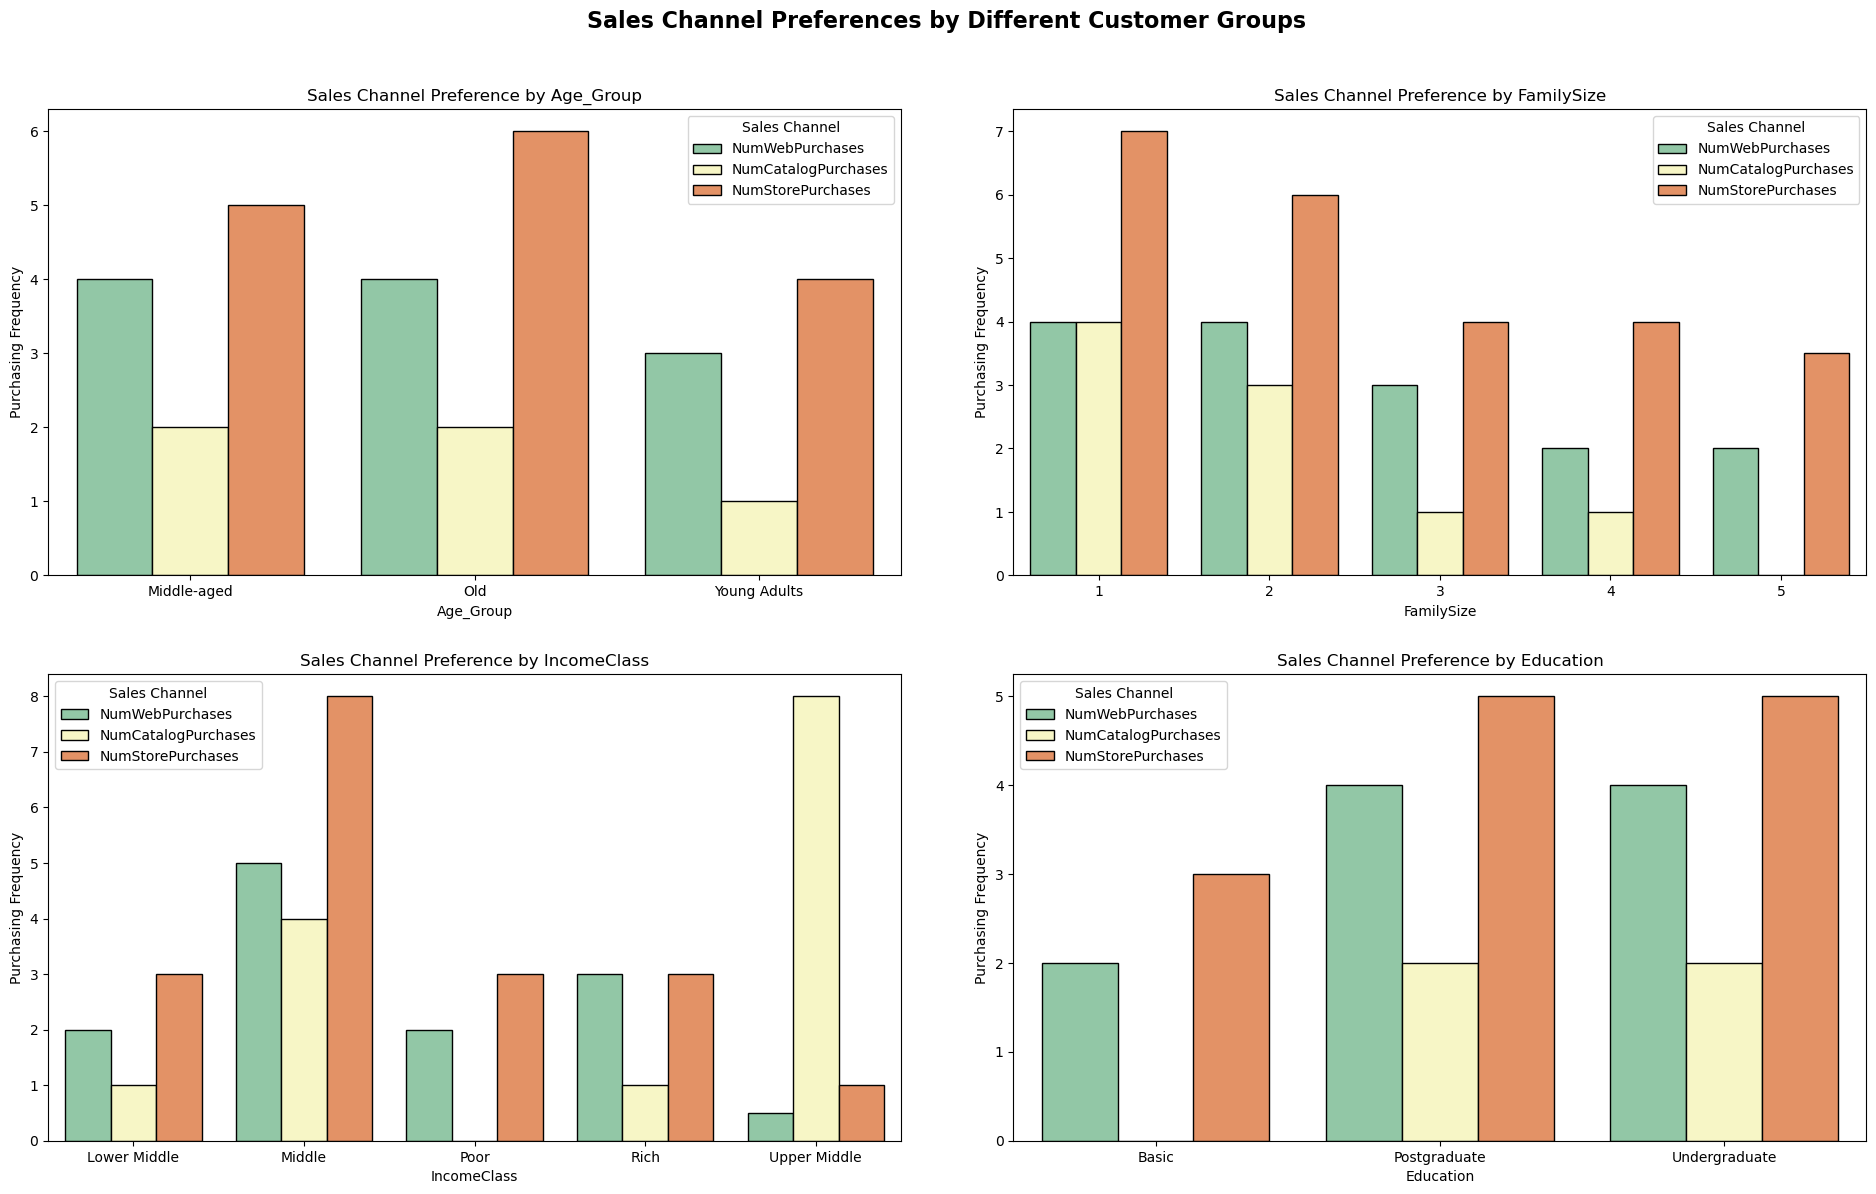

In [27]:
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cust_group = ['Age_Group', 'FamilySize', 'IncomeClass', 'Education']

# creating grid & specify size
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
plt.tight_layout(pad=5.0)

# creating title
fig.suptitle('Sales Channel Preferences by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

# looping through cust_group for grouping and plotting
for i, group in enumerate(cust_group):
    # calculating position
    row = i // 2
    col = i % 2
    # prepare data
    grouped_data = df_copy.groupby(group)[channels].median().reset_index().melt(id_vars=[group])
    # creating barplot
    sns.barplot(data=grouped_data, x=group, y='value', hue='variable', palette='Spectral_r', ax=axs[row, col], edgecolor='black')
    # creating title for each plot
    axs[row, col].set_title(f'Sales Channel Preference by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Purchasing Frequency')
    axs[row, col].legend(title='Sales Channel')

plt.show()

From the charts above, we can see that :

**Age Category:**
- The most frequently used purchasing channel across all age categories is in-store purchases, followed by purchases made through the website.
- The frequency of deal purchases and catalogue purchases is equivalent across each group.

 **Family Size:**
- The dominant purchasing channel in each category is in-store purchasing, followed by web purchasing.
- The interest in catalogue purchases is highest among single customers and decreases as family size increases. Catalogue purchases could be a strategy to target customers with smaller family sizes.

**Income Class:**
- In-store purchasing is the dominant channel in the lower middle, middle, and poor income classes.
- Catalogue purchases are most popular among the upper middle class.

**Education Level:**
- In-store purchasing is the highest channel in each category, followed by purchases from the website..
- In the basic category, catalogue purchases are less favored.


#### **5. How do respons to deals differ across various customer demographics?**

In [28]:
# check T_NPurchase normality

stats, pval=normaltest(df_copy['NumDealsPurchases'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


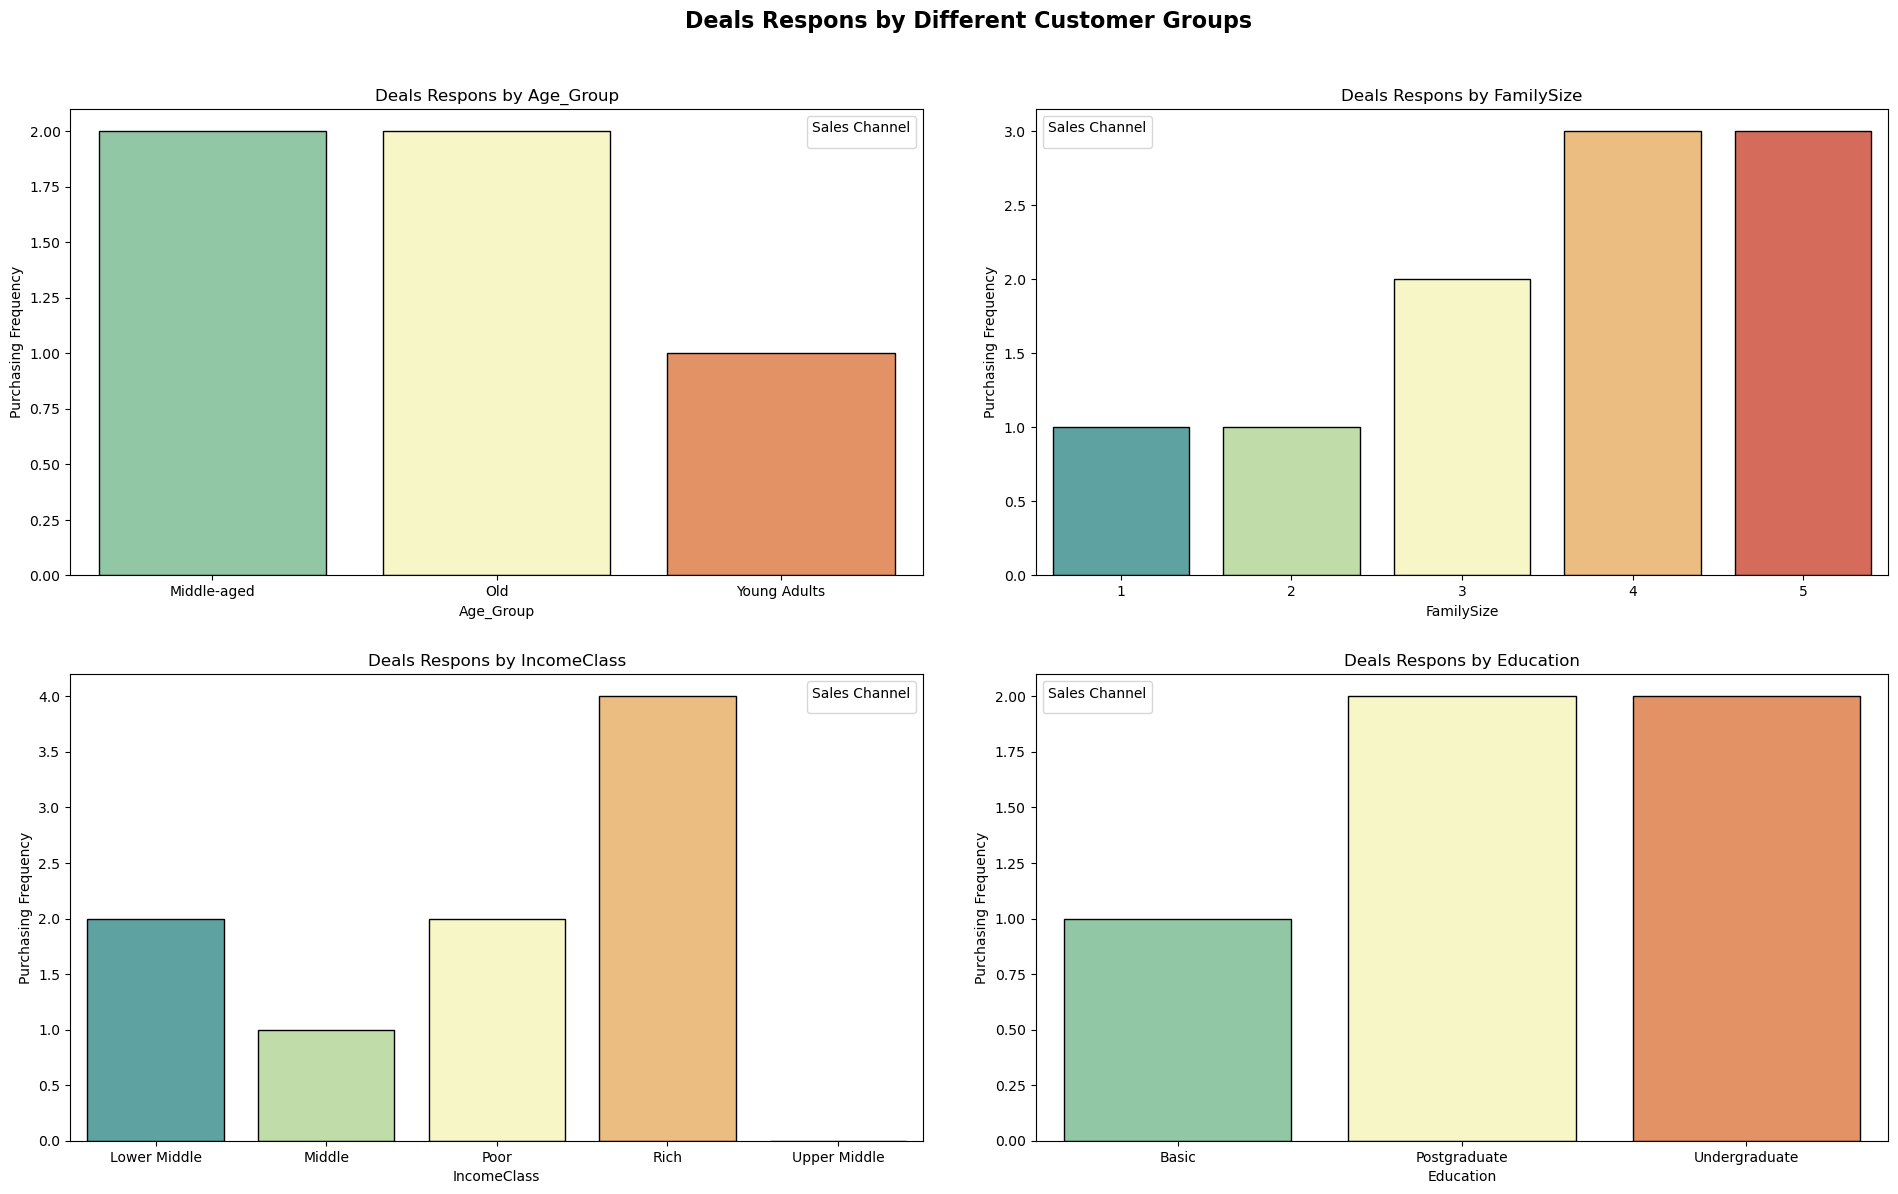

In [29]:
deals = ['NumDealsPurchases']
cust_group = ['Age_Group', 'FamilySize', 'IncomeClass', 'Education']

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
plt.tight_layout(pad=5.0)

fig.suptitle('Deals Respons by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for i, group in enumerate(cust_group):
    row = i // 2
    col = i % 2
    grouped_data = df_copy.groupby(group)[deals].median().reset_index().melt(id_vars=[group])
    sns.barplot(data=grouped_data, x=group, y='value', palette='Spectral_r', ax=axs[row, col], edgecolor='black')
    axs[row, col].set_title(f'Deals Respons by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Purchasing Frequency')
    axs[row, col].legend(title='Sales Channel')

plt.show()

**Age Group:**

- Young adults and middle-aged individuals seem to purchase deals at a higher median rate compared to the old age group.

**Education:**

- Customers with basic education level tend to purchase more deals, while those with a PhD tend to purchase fewer deals.

**Family Size:**

- The median number of deals purchased seems to slightly decrease as the family size increases, with some variation.

**Income Class:**

- Lower middle income and poor classes tend to purchase more deals compared to middle and upper-middle classes.

#### **6. How do campaign acceptance differ various customer demographics?**

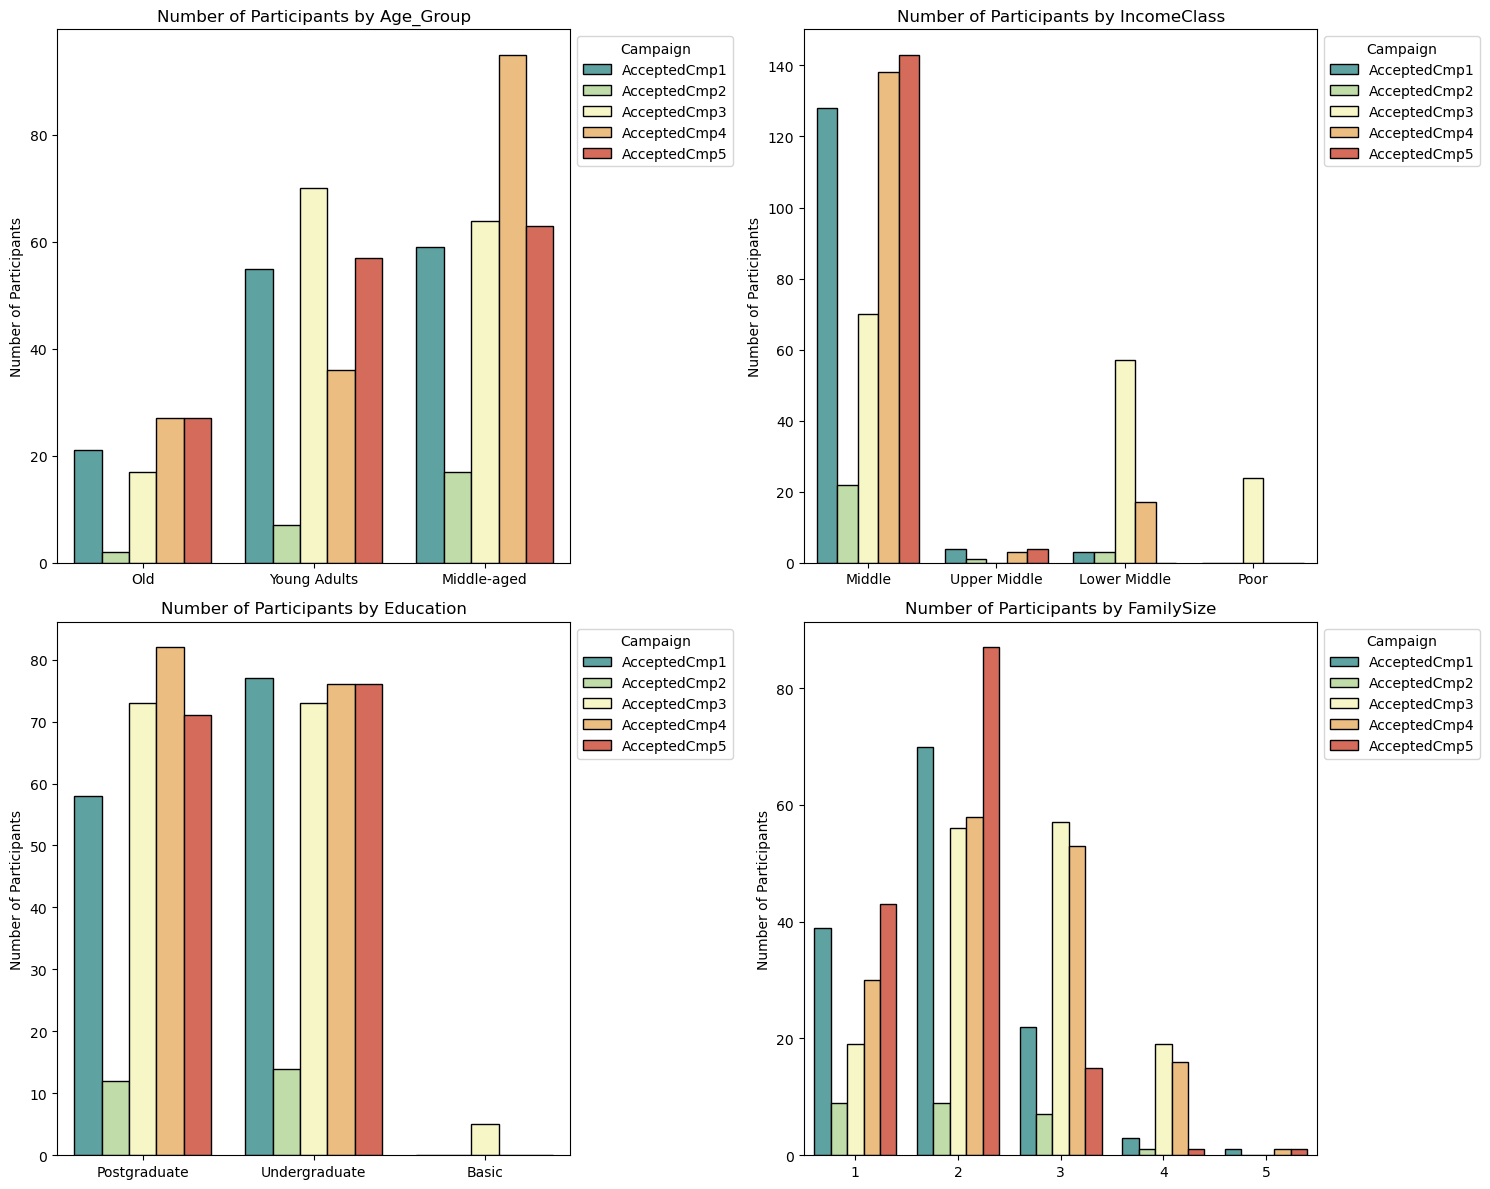

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
columns_to_analyze = ['Age_Group', 'IncomeClass', 'Education', 'FamilySize']

for ax, col in zip(axs.flatten(), columns_to_analyze):
    # Melting the DataFrame to have one column for the responses
    melted_df = df_copy.melt(id_vars=col, value_vars=campaign_columns, var_name='Campaign', value_name='Response')
    
    # Keeping only accepted responses
    melted_df = melted_df[melted_df['Response'] == 1]
    
    # Creating a countplot
    sns.countplot(data=melted_df, x=col, hue='Campaign', palette='Spectral_r', ax=ax, edgecolor='black')
    
    ax.set_title(f'Number of Participants by {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Number of Participants')
    ax.legend(title='Campaign', bbox_to_anchor=(1, 1), loc='upper left')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


1. Age Group
AcceptedCmp1 is predominantly accepted by the middle-aged group, followed by young adults. There’s a noticeable drop in acceptance among the old age group.
Other campaigns also seem to resonate more with the middle-aged and young adults, with the old age group showing less interest across all campaigns.
2. Income Class
The middle income class predominantly participates in AcceptedCmp1. There’s a significant drop in participation from the lower middle and upper middle income classes, and no participation from the poor income class.
Similar trends are observed in other campaigns, where the middle income class seems to be the primary target audience showing interest.
3. Education
Participants with an undergraduate education show the highest acceptance for AcceptedCmp1, followed by those with a postgraduate education. Other education categories have minimal to no participation.
A similar trend is observed in other campaigns, where individuals with undergraduate and postgraduate educations are the most active.
4. Family Size
AcceptedCmp1 is mainly accepted by participants with a family size of 1 or 2. There's a decline in acceptance as the family size increases.
This trend of higher acceptance rates among smaller families is somewhat consistent across other campaigns as well.

**INSIGHT :** 

Age and Education: The campaigns, especially AcceptedCmp1, are more effective among the middle-aged group and those with undergraduate education.
Income Class: Middle income class individuals are more responsive to the campaigns.
Family Size: Smaller families (1-2 members) seem to be more receptive to the campaigns.

### **`Q3. What potential areas can be developed or improved to enhance future campaigns and sales?`**

### **Potential Customer**

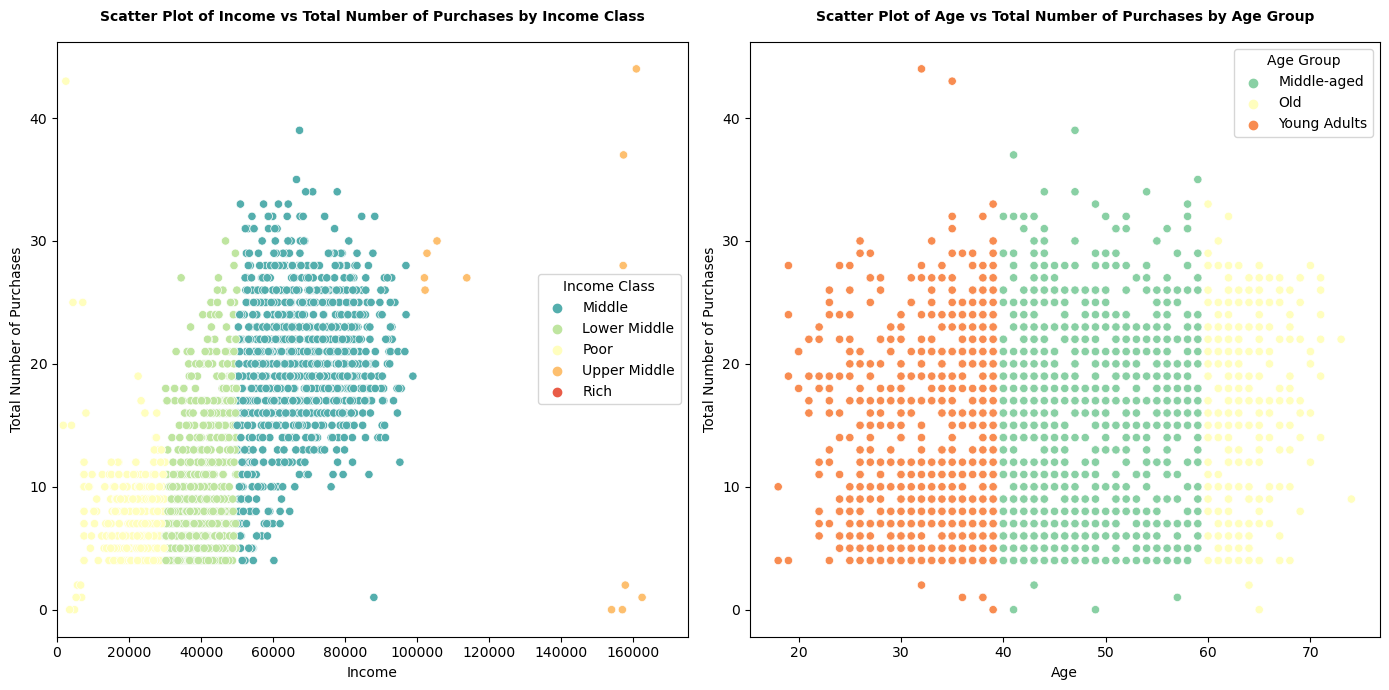

In [31]:
# Creating a figure
plt.figure(figsize=(14, 7))

# Creating the first subplot
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.scatterplot(x="Income", y='T_NPurchase', hue='IncomeClass', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Income vs Total Number of Purchases by Income Class", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Income')
plt.ylabel('Total Number of Purchases')
plt.legend(title='Income Class')
plt.xlim(0, 175000)

# Creating the second subplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.scatterplot(x="Age", y='T_NPurchase', hue='Age_Group', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Age vs Total Number of Purchases by Age Group", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Age')
plt.ylabel('Total Number of Purchases')
plt.legend(title='Age Group')

# Displaying the plots
plt.tight_layout()  # Adjusts the plots to ensure they fit without overlapping
plt.show()

1. **Income vs Total Number of Purchases**

- Lower Income Groups: Individuals from lower income groups, especially the 'Poor' and 'Lower Middle' classes, generally show a lower total number of purchases.
- Middle to Upper Income Groups: As income levels increase (Middle to Upper Middle class), there seems to be a wider distribution in the total number of purchases, with some individuals making a higher number of purchases.
- No Clear Correlation: There isn’t a clear, strong correlation between income and the total number of purchases, as there is a wide spread of data points across various income levels.

2. **Age vs Total Number of Purchases**

- Younger Individuals: Younger individuals (Young Adults) seem to have a varied total number of purchases, with no clear trend indicating whether age influences purchasing behavior significantly.
- Middle-aged to Older Individuals: Middle-aged individuals have a wider spread in the total number of purchases, indicating more variability in purchasing behavior in this age group. The old age group doesn’t show a clear trend but is somewhat scattered as well.
- No Strong Trend: Similar to the income plot, there isn’t a strong observable trend between age and the total number of purchases.

Overall : 
- Income: Higher income doesn’t necessarily translate into a higher total number of purchases. Other factors might be influencing purchasing behavior.
- Age: Age alone doesn’t seem to be a decisive factor in the total number of purchases. Different age groups show a broad distribution in purchasing behavior.
- Variability: There is high variability in the total number of purchases across different income and age groups, suggesting that these factors alone might not be strong predictors of purchasing behavior.

These insights suggest that individual income and age might not be the sole determinants of purchasing behavior, and a combination of various factors could contribute to a person's propensity to make purchases. Consider analyzing additional variables or combinations of variables to derive more nuanced insights.​

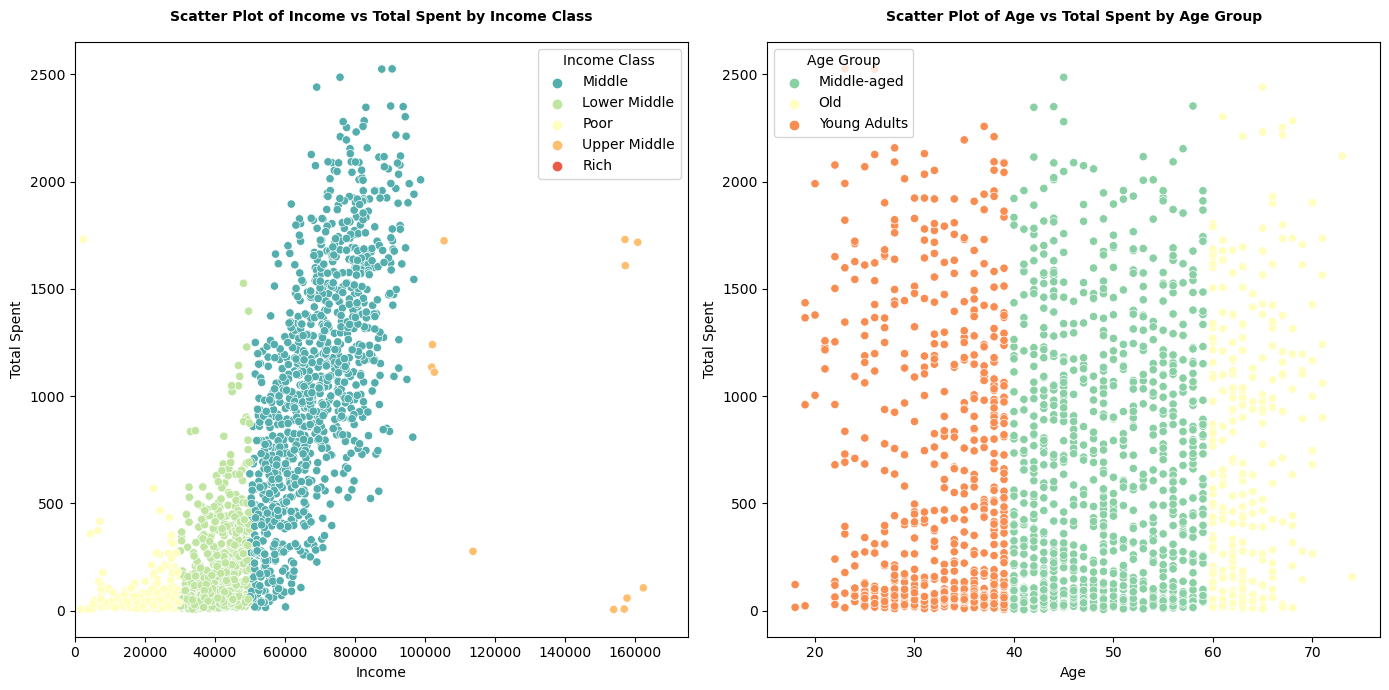

In [32]:
# Creating a figure
plt.figure(figsize=(14, 7))

# Creating the first subplot
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.scatterplot(x="Income", y='T_AmountSpent', hue='IncomeClass', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Income vs Total Spent by Income Class", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.legend(title='Income Class')
plt.xlim(0, 175000)

# Creating the second subplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.scatterplot(x="Age", y='T_AmountSpent', hue='Age_Group', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Age vs Total Spent by Age Group", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.legend(title='Age Group')

# Displaying the plots
plt.tight_layout()  # Adjusts the plots to ensure they fit without overlapping


1. **Income vs Total Amount Spent**

- **Lower Income Groups**: Individuals in the 'Poor' and 'Lower Middle' income classes tend to spend less overall, as expected due to their limited financial resources.
Middle to Upper Income Groups: People in the 'Middle' and 'Upper Middle' income classes exhibit a broader range of total spending amounts, with some individuals spending quite significantly.
- **Correlation**: There seems to be a general trend where higher income is associated with higher total spending, but there are also many exceptions and a wide dispersion of data points.

2. **Age vs Total Amount Spent**

- **Younger Individuals**: Young Adults have a wide range of spending behaviors, with some spending very little and others spending quite a bit.
- **Middle-aged to Older Individuals**: The middle-aged group also shows a wide dispersion in spending, while the older age group seems to have a more clustered spending behavior with fewer high spenders.
- **Trend:** There isn’t a strong, consistent trend indicating that age is a decisive factor in total spending, as there is a fair amount of variability across all age groups.

**Summary**

- **Income:** While there's a general trend of higher income leading to higher spending, there are numerous exceptions, and the correlation is not very strong.
- **Age:** There's a diverse range of spending behaviors across all age groups, and age doesn’t seem to be a definitive factor in determining total spending.
- **Variability**: Both graphs exhibit substantial variability, indicating that other factors, possibly beyond just income and age, influence individuals' total spending.

These insights can guide marketing strategies by highlighting the importance of considering various factors and their interactions in influencing customer spending behaviors. It might be beneficial to explore other variables and multi-variable analyses to get a more comprehensive understanding of customer spending patterns.​​



### **Potential Products**

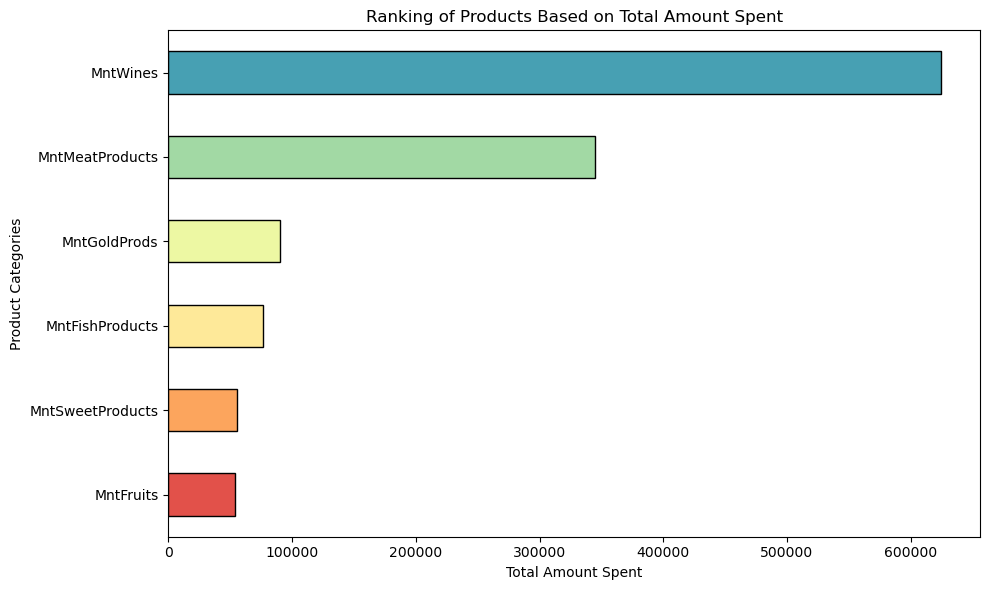

In [33]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_amount_spent = df_copy[product_columns].sum()

product_ranking = total_amount_spent.sort_values(ascending=False)

colors = sns.color_palette("Spectral", len(product_ranking))

plt.figure(figsize=(10, 6))
product_ranking.sort_values().plot(kind='barh', color=colors, edgecolor='black')

plt.ylabel('Product Categories')
plt.xlabel('Total Amount Spent')
plt.title('Ranking of Products Based on Total Amount Spent')

for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + i.get_height() / 2, 
            f'{int(i.get_width())}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


1. **Wine Dominance**

Wines appear to be the most popular product category, with the highest total amount spent. This indicates that wines are a significant contributor to the company's revenue and are highly favored by customers.

2. **Meat Products**

Meat products come second in the total spending, showing that they are also a vital part of the product portfolio, resonating well with customer preferences.

3. **Fruits, Fish, Sweets, and Gold Products**

Fruits, fish products, sweet products, and gold products have lower total spending, with fruits and fish products being moderately popular.
Sweet products and gold products have the lowest total spending, indicating less customer interest or lower sales volumes in these categories.

4. **Variability in Spending**

There’s a significant variability in spending across different product categories, with wines and meat products dominating the customer spending.

**Overall :** 

**Focus on Wines and Meat Products:**

Since these categories generate the highest revenue, continued focus and potentially expanding offerings in these categories could be beneficial.
Evaluate Less Popular Categories: Consider evaluating the performance of sweet and gold products to understand the lower customer spending and explore strategies to improve their performance.

**Diversification:**

Since the spending is heavily skewed towards wines and meat products, exploring diversification strategies to enhance the performance of other categories might be helpful to reduce dependency on a few key products. These insights can help in strategizing product offerings, marketing efforts, and customer engagement to enhance sales and customer satisfaction across various product categories.​​


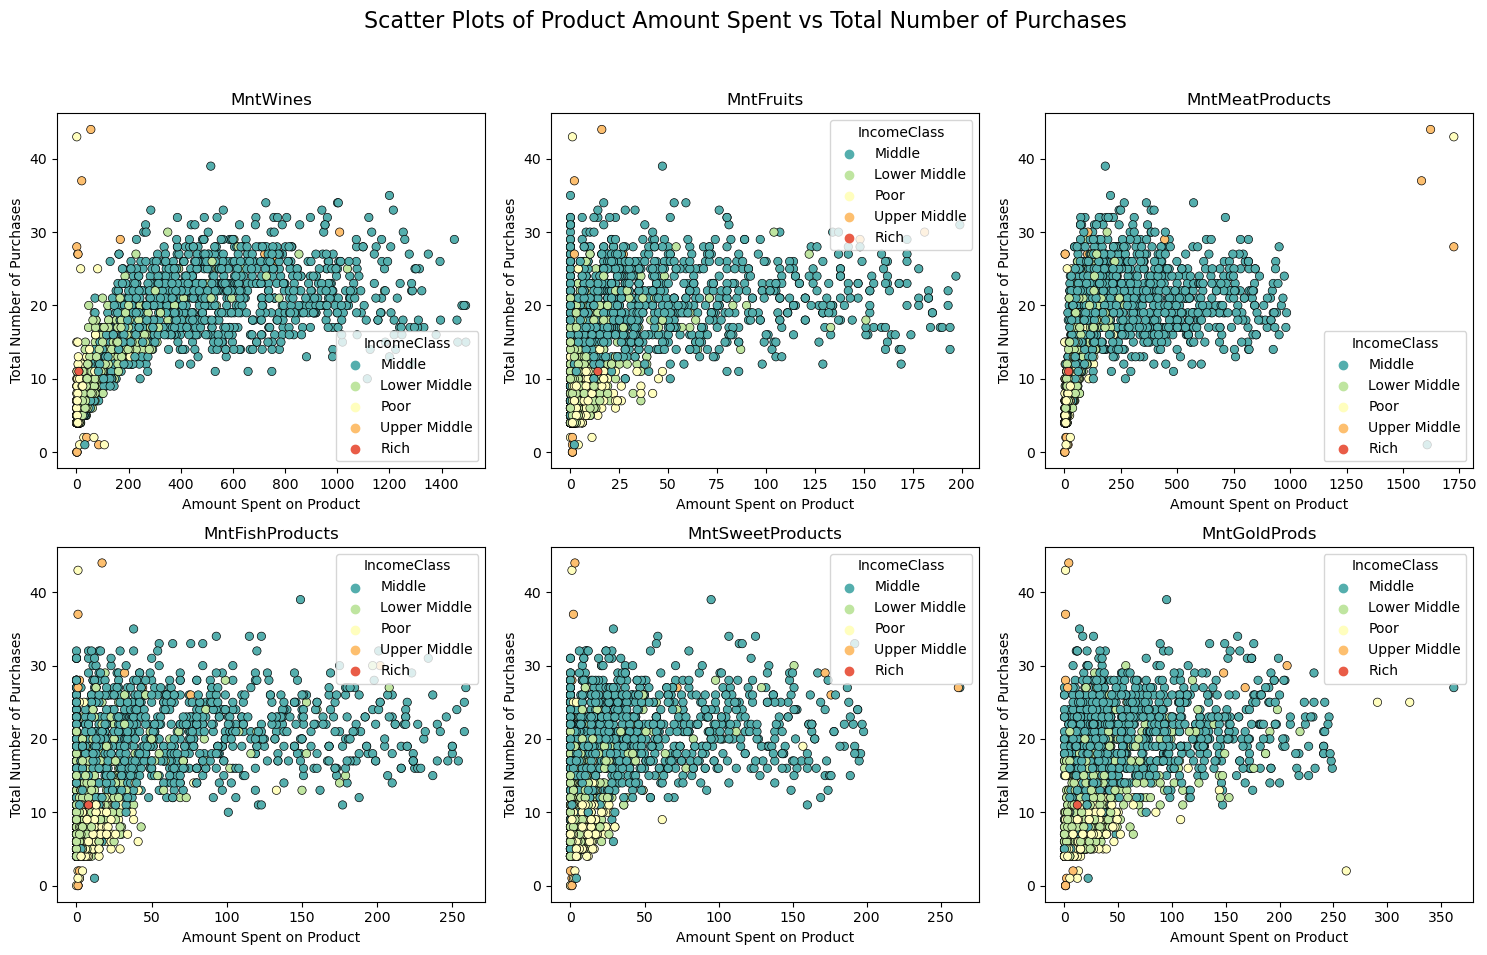

In [34]:
# Creating scatter plots to visualize the relationship between each product and the total number of purchases
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots of Product Amount Spent vs Total Number of Purchases', fontsize=16)
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Flattening the axis array for easy iteration
axs = axs.ravel()

# Creating scatter plots for each product
for i, column in enumerate(product_columns):
    sns.scatterplot(data=df_copy, x=column, y='T_NPurchase', ax=axs[i], hue='IncomeClass', palette='Spectral_r', edgecolor='black')
    axs[i].set_title(column)
    axs[i].set_xlabel('Amount Spent on Product')
    axs[i].set_ylabel('Total Number of Purchases')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make sure everything fits without overlapping
plt.show()

1. Product Potency: Wines and Meat Products
Wines: Dominating in total spending, wines show a varied correlation with the total number of purchases across different income classes. It seems like a potent category where marketing efforts could be optimized for higher revenue.
Meat Products: Also high in total spending, meat products have a fairly diverse spread in the scatter plots, indicating a balanced interest across various customer segments.
2. Moderate Performers: Fruits and Fish Products
Fruits and Fish Products: These categories show moderate performance in total spending. In the scatter plots, these products have a relatively scattered distribution, indicating room for optimization in targeting various customer segments.
3. Room for Improvement: Sweet and Gold Products
Sweet and Gold Products: These categories have lower total spending and also exhibit less significant correlations in the scatter plots. This indicates a potential area where marketing strategies could be revisited and optimized.
4. Income Class Differentiation
Different income classes show varied spending behaviors across products, which could be used to tailor marketing strategies specific to customer segments.
Summary and Strategic Recommendations
Focus on Strengths: Continue to leverage the strong performance of wines and meat products by optimizing marketing strategies to target customer segments more effectively.
Explore Diversification: Consider revisiting the marketing approach for fruits, fish products, sweet products, and gold products to enhance their appeal and performance.
Personalized Marketing: Utilize the insights from the scatter plots to develop more personalized marketing strategies, considering the spending patterns of different income classes.
Continuous Analysis: Regularly analyze and update marketing strategies based on changing customer behaviors and market trends to maintain and improve product potency.

### **Potential Channel**

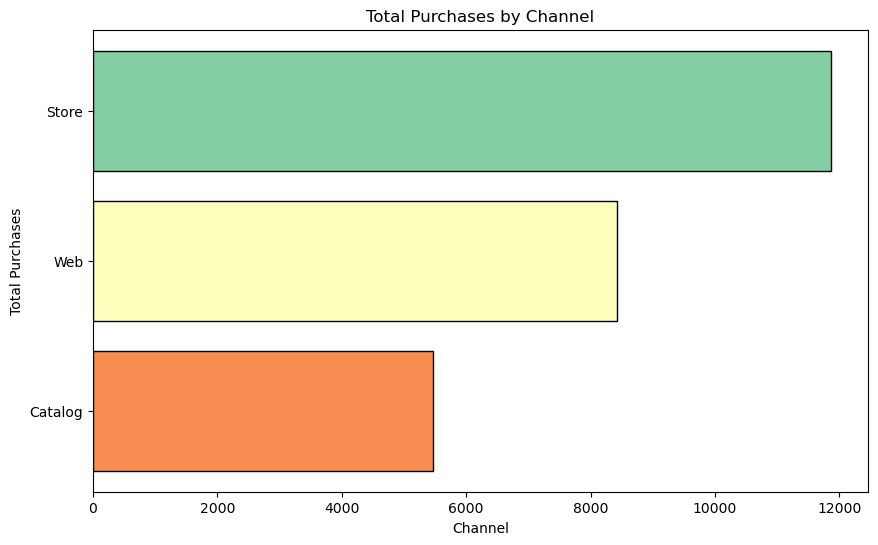

In [35]:

channels_df = pd.DataFrame({
    'Channel': ['Web', 'Catalog', 'Store'],
    'Total_Purchases': [
        df_copy['NumWebPurchases'].sum(),
        df_copy['NumCatalogPurchases'].sum(),
        df_copy['NumStorePurchases'].sum()
    ]
})

# Sorting the DataFrame by Total_Purchases in descending order
channels_df.sort_values(by='Total_Purchases', ascending=True, inplace=True)
colors = sns.color_palette("Spectral", len(channels_df))
# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.barh(channels_df['Channel'], channels_df['Total_Purchases'], color=colors, edgecolor='black')
plt.title('Total Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Purchases')
plt.show()


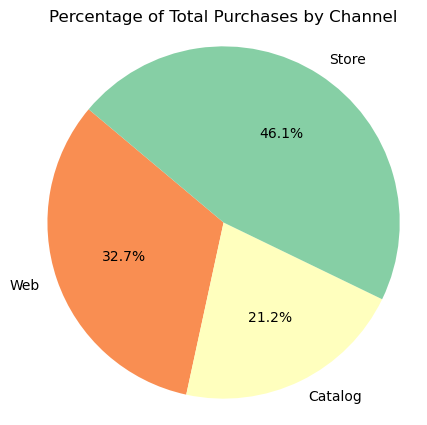

In [36]:
channels_df = pd.DataFrame({
    'Channel': ['Web', 'Catalog', 'Store'],
    'Total_Purchases': [
        df_copy['NumWebPurchases'].sum(),
        df_copy['NumCatalogPurchases'].sum(),
        df_copy['NumStorePurchases'].sum()
    ]
})

# Creating the pie chart
plt.figure(figsize=(5, 5))
plt.pie(channels_df['Total_Purchases'], labels=channels_df['Channel'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Spectral", len(channels_df)))
plt.title('Percentage of Total Purchases by Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


1. Store Purchases Dominance
Store purchases dominate, accounting for the highest number of total purchases. This indicates that the physical store is currently the most effective channel for sales.
2. Web and Catalog Channels
The Web and Catalog channels also hold significant portions of the total purchases, showcasing their relevance and effectiveness in the customer purchase journey.
3. Deals Channel
The Deals channel has the lowest total purchases, indicating it as the least effective or least utilized channel among the options available.
4. Diversification
The pie chart illustrates a diversified channel strategy where, besides the store, other channels like Web and Catalog also contribute significantly to the total purchases.
Summary and Strategic Recommendations
Strengthening Strong Channels: Continue investing in and optimizing the Store, Web, and Catalog channels as they are currently performing well.
Evaluating the Deals Channel: Consider evaluating and optimizing the Deals channel's performance and strategies, as it has the lowest contribution.
Multichannel Strategy: Maintaining a diverse multichannel strategy can help in reaching different customer segments effectively.
Exploration and Innovation: Explore new channel strategies and innovations to enhance customer reach and engagement across various channels, including improving the Deals channel’s effectiveness.

### **Exploring the right time to do campaign**

One aspect that could be explored is identifying the most potential time to conduct a campaign. From the data, we can determine the days and months when the most members join. This insight could be instrumental in planning and optimizing the timing of future campaigns to maximize engagement and participation.

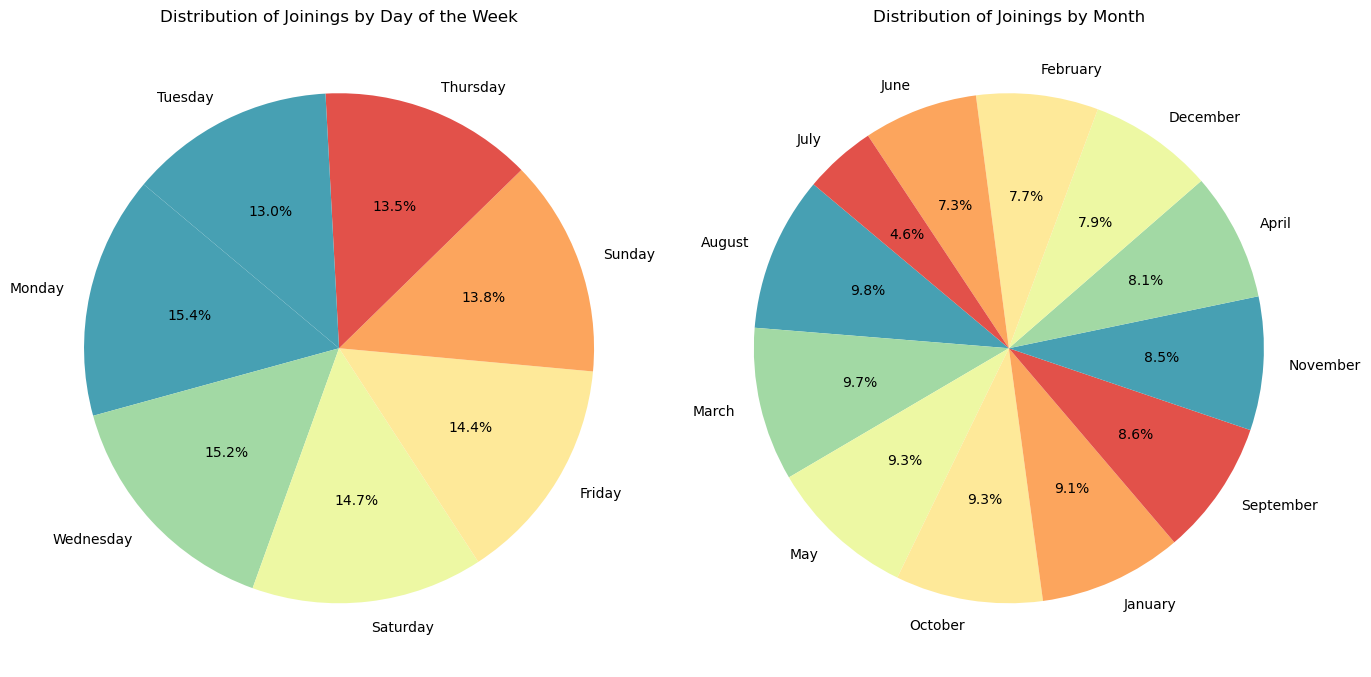

In [37]:
day_counts = df_copy['Day_Joined'].value_counts(normalize=True) * 100
month_counts = df_copy['Month_Joined'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Spectral_r"))
axs[0].set_title('Distribution of Joinings by Day of the Week')

axs[1].pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Spectral_r"))
axs[1].set_title('Distribution of Joinings by Month')

plt.tight_layout()
plt.show()


The pie chart reveals a varied distribution of memberships across different months. No single month dominates in terms of new joinings. Certain months show slightly higher membership rates. This could be influenced by seasonal trends or specific marketing activities that might make joining more attractive during these times.

The positive implications for the business are:
1. **Steady membership interest:** 
A consistent distribution pattern is observed across the days of the week, signifying a sustained level of interest and engagement in joining, without notable variations or disparities.

2. **Day-independent joining trend:** 
The analysis suggests that there isn’t a particular day that significantly overshadows others in terms of new memberships. This indicates a lack of dependency on specific days, portraying a more universal appeal and accessibility of the membership across the entire week.

### **Web Visit**

---------------------------------------------------

## **Conclusion**

1. How effective were the previous campaigns in attracting customers and enhancing sales?

    - 
    - 
2. What insights can we gain regarding customer purchasing behavior based on their demographic information?

    - 
    - 
3. What potential areas can be developed or improved to enhance future campaigns and sales?

    - 
    - 
    

---------------------------------------------------
## **Recommendation**